# Overview of GALAH+~DR3, compared with APOGEE DR16 & LAMOST DR5 VAC

## Author(s): Sven Buder (SB, WG4)


### History:
200408 SB Created

In [2]:
# Preamble for notebook 

# Compatibility with Python 3
from __future__ import (absolute_import, division, print_function)

try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

# Basic packages
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import glob
import sys
import os
import scipy
import pandas as pd
from astropy.table import Table, hstack, vstack, join
from itertools import combinations, product
from tqdm.notebook import tqdm

from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy import coordinates

# Matplotlib and associated packages for plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.transforms import Bbox,TransformedBbox
from matplotlib.image import BboxImage
from matplotlib.legend_handler import HandlerBase
from matplotlib._png import read_png
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors

params = {
    'font.family'        : 'sans',
    'font.size'          : 17,
    'axes.labelsize'     : 20,
    'ytick.labelsize'    : 16,
    'xtick.labelsize'    : 16,
    'legend.fontsize'    : 20,
    'text.usetex'        : True, 
    'text.latex.preamble': [r'\usepackage{upgreek}', r'\usepackage{amsmath}'],
    }   
plt.rcParams.update(params)

_parula_data = [[0.2081, 0.1663, 0.5292], 
                [0.2116238095, 0.1897809524, 0.5776761905], 
                [0.212252381, 0.2137714286, 0.6269714286], 
                [0.2081, 0.2386, 0.6770857143], 
                [0.1959047619, 0.2644571429, 0.7279], 
                [0.1707285714, 0.2919380952, 0.779247619], 
                [0.1252714286, 0.3242428571, 0.8302714286], 
                [0.0591333333, 0.3598333333, 0.8683333333], 
                [0.0116952381, 0.3875095238, 0.8819571429], 
                [0.0059571429, 0.4086142857, 0.8828428571], 
                [0.0165142857, 0.4266, 0.8786333333], 
                [0.032852381, 0.4430428571, 0.8719571429], 
                [0.0498142857, 0.4585714286, 0.8640571429], 
                [0.0629333333, 0.4736904762, 0.8554380952], 
                [0.0722666667, 0.4886666667, 0.8467], 
                [0.0779428571, 0.5039857143, 0.8383714286], 
                [0.079347619, 0.5200238095, 0.8311809524], 
                [0.0749428571, 0.5375428571, 0.8262714286], 
                [0.0640571429, 0.5569857143, 0.8239571429], 
                [0.0487714286, 0.5772238095, 0.8228285714], 
                [0.0343428571, 0.5965809524, 0.819852381], 
                [0.0265, 0.6137, 0.8135], 
                [0.0238904762, 0.6286619048, 0.8037619048], 
                [0.0230904762, 0.6417857143, 0.7912666667], 
                [0.0227714286, 0.6534857143, 0.7767571429], 
                [0.0266619048, 0.6641952381, 0.7607190476], 
                [0.0383714286, 0.6742714286, 0.743552381], 
                [0.0589714286, 0.6837571429, 0.7253857143], 
                [0.0843, 0.6928333333, 0.7061666667], 
                [0.1132952381, 0.7015, 0.6858571429], 
                [0.1452714286, 0.7097571429, 0.6646285714], 
                [0.1801333333, 0.7176571429, 0.6424333333], 
                [0.2178285714, 0.7250428571, 0.6192619048], 
                [0.2586428571, 0.7317142857, 0.5954285714], 
                [0.3021714286, 0.7376047619, 0.5711857143], 
                [0.3481666667, 0.7424333333, 0.5472666667], 
                [0.3952571429, 0.7459, 0.5244428571], 
                [0.4420095238, 0.7480809524, 0.5033142857], 
                [0.4871238095, 0.7490619048, 0.4839761905], 
                [0.5300285714, 0.7491142857, 0.4661142857], 
                [0.5708571429, 0.7485190476, 0.4493904762],
                [0.609852381, 0.7473142857, 0.4336857143], 
                [0.6473, 0.7456, 0.4188], 
                [0.6834190476, 0.7434761905, 0.4044333333], 
                [0.7184095238, 0.7411333333, 0.3904761905], 
                [0.7524857143, 0.7384, 0.3768142857], 
                [0.7858428571, 0.7355666667, 0.3632714286], 
                [0.8185047619, 0.7327333333, 0.3497904762], 
                [0.8506571429, 0.7299, 0.3360285714], 
                [0.8824333333, 0.7274333333, 0.3217], 
                [0.9139333333, 0.7257857143, 0.3062761905], 
                [0.9449571429, 0.7261142857, 0.2886428571], 
                [0.9738952381, 0.7313952381, 0.266647619], 
                [0.9937714286, 0.7454571429, 0.240347619], 
                [0.9990428571, 0.7653142857, 0.2164142857], 
                [0.9955333333, 0.7860571429, 0.196652381], 
                [0.988, 0.8066, 0.1793666667], 
                [0.9788571429, 0.8271428571, 0.1633142857], 
                [0.9697, 0.8481380952, 0.147452381], 
                [0.9625857143, 0.8705142857, 0.1309], 
                [0.9588714286, 0.8949, 0.1132428571], 
                [0.9598238095, 0.9218333333, 0.0948380952], 
                [0.9661, 0.9514428571, 0.0755333333], 
                [0.9763, 0.9831, 0.0538]]

parula = ListedColormap(_parula_data, name='parula')
parula_zero = _parula_data[0]
parula_0 = ListedColormap(_parula_data, name='parula_0')
parula_0.set_bad((1,1,1))
parula_r = ListedColormap(_parula_data[::-1], name='parula_r')

willi_blau = [0.0722666667, 0.4886666667, 0.8467]

In [3]:
import galpy
#from galpy.potential import MWPotential2014 as pot
from galpy.potential.mwpotentials import McMillan17 as pot
from galpy.util.bovy_conversion import get_physical
from galpy.actionAngle import actionAngleStaeckel
from galpy.orbit import Orbit

# Reference values
#r_galactic_centre = 8.178*u.kpc # Gravity Collaboration, 2019, A&A, 625, 10
r_galactic_centre = 8.21*u.kpc # McMillan Potential, 2017
z_galactic_plane = 25.0*u.pc # Bland-Hawthorn & Gerhard, 2016, ARA&A, 54, 529

print('Reference frame:')
print('R_GC = '+str(r_galactic_centre)+' (McMillan, 2017, MNRAS, 465, 76)')
print('phi_GC = '+str(0*u.rad))
print('z_GC = '+str(z_galactic_plane)+' (Bland-Hawthorn & Gerhard, 2016, ARA&A, 54, 529)')

v_total_sun = (np.tan(6.379*u.mas)*r_galactic_centre/u.yr).to(u.km/u.s) # pm_l by Reid & Brunthaler 2004, ApJ, 616, 872
print('V_total_sun: = '+"{:.2f}".format(v_total_sun)+' (Reid & Brunthaler 2004, ApJ, 616, 872)')
v_peculiar = [11.1, 15.17, 7.25]*u.km/u.s # U and W from Schoenrich, Binney, Dehnen, 2010, MNRAS, 403, 1829, V so that V = V_total-V_sun
print('V_peculiar = ',(v_peculiar),' (U and W from Schoenrich, Binney, Dehnen, 2010, MNRAS, 403, 1829)')
print('V-component of V_peculiar = 15.17 km/s, instead of 12.24 km/s by Schoenrich et al. (2010), for matching v_circular')
v_circular = np.round(v_total_sun-v_peculiar[1],1)
print('V_circular = ',(v_circular),' (McMillan, 2017, MNRAS, 465, 76)')

aAS = actionAngleStaeckel(
        pot   = pot,        #potential                                                                                                                                                                      
        delta = 0.45,       #focal length of confocal coordinate system                                                                                                                            
        c     = True        #use C code (for speed)                                                                                                                                                         
        )

#(RA = 17:45:37.224 h:m:s, Dec = −28:56:10.23 deg) (Reid& Brunthaler 2004)

  Referenced from: /Users/svenbuder/anaconda3/lib/python3.7/site-packages/libgalpy.cpython-37m-darwin.so
  Reason: image not found' 
Reference frame:
R_GC = 8.21 kpc (McMillan, 2017, MNRAS, 465, 76)
phi_GC = 0.0 rad
z_GC = 25.0 pc (Bland-Hawthorn & Gerhard, 2016, ARA&A, 54, 529)
V_total_sun: = 248.27 km / s (Reid & Brunthaler 2004, ApJ, 616, 872)
V_peculiar =  [11.1  15.17  7.25] km / s  (U and W from Schoenrich, Binney, Dehnen, 2010, MNRAS, 403, 1829)
V-component of V_peculiar = 15.17 km/s, instead of 12.24 km/s by Schoenrich et al. (2010), for matching v_circular
V_circular =  233.1 km / s  (McMillan, 2017, MNRAS, 465, 76)


In [4]:
dr3_main = Table.read('../../catalogs/GALAH_DR3_main_allstar_v1.fits')
dr3_ext = Table.read('../../catalogs/GALAH_DR3_main_allspec_v1.fits')
ext = dict()
ext['sobject_id'] = dr3_ext['sobject_id']; ext['age'] = dr3_ext['age']
dr3_main = join(dr3_main, ext, keys='sobject_id',metadata_conflicts='silent')
dr3_vac_dyn = Table.read('../../catalogs/GALAH_DR3_VAC_dynamics_v1.fits')
dr3 = join(dr3_main, dr3_vac_dyn, keys='sobject_id',metadata_conflicts='silent')
dr3_main = []; ext = []

In [9]:
for each_flag in 2**np.arange(0,11):
    flag_raised = np.where((dr3_ext['flag_sp'] & each_flag) != 0)[0]
    print(each_flag,"{:.2f}".format(100*len(flag_raised)/len(dr3_ext['flag_sp'])))

1 8.53
2 1.70
4 5.56
8 8.63
16 0.04
32 1.45
64 1.87
128 0.93
256 8.00
512 2.38
1024 2.21


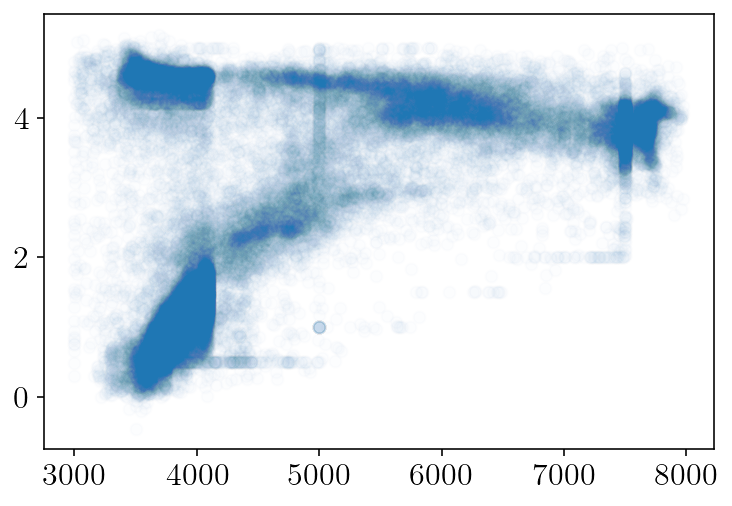

In [10]:
bad_256 = np.where((dr3_ext['flag_sp'] & 256) != 0)[0]
plt.scatter(
    dr3_ext['teff'][bad_256],
    dr3_ext['logg'][bad_256],
    alpha=0.01
)

In [11]:
flag1 = np.where(dr3_ext['flag_sp'] == 1)
flag2 = np.where(dr3_ext['flag_sp'] == 1)

In [12]:
apogee = Table.read('../../../Surveys/APOGEE_DR16.fits')
lamost_vac = Table.read('../../../Surveys/LAMOST_DR5_VAC_Xiang/DD-PayneG_LMDR5.fits')
#lamost_vac = Table.read('../../../Surveys/LAMOST_DR5_VAC_Xiang/DD-PayneA_LMDR5.fits')
lamost_gaia = Table.read('../../../Surveys/LAMOST_DR5_VAC_Xiang/DD-Payne_GaiaDR2.fits')
lamost = join(lamost_vac, lamost_gaia, keys='SPECID',metadata_conflicts='silent')
lamost_vac = []; lamost_gaia = []

In [13]:
print('Unique GALAH DR3 stars / GALAH DR3 spectra')
print(len(np.unique(dr3['star_id'])),len(dr3['star_id']))

print('Unique APOGEE DR16 stars / APOGEE DR16 spectra')
print(len(np.unique(apogee['APOGEE_ID'])),len(apogee['APOGEE_ID']))

print('Unique LAMOST DR5 stars / LAMOST DR5 spectra')
print(len(np.unique(lamost['SID1'])),len(lamost['SID1']))

Unique GALAH DR3 stars / GALAH DR3 spectra
588568 588571
Unique APOGEE DR16 stars / APOGEE DR16 spectra
437445 473307
Unique LAMOST DR5 stars / LAMOST DR5 spectra
6090051 8161492


In [14]:
print('Overlap GALAH DR3 & APOGEE DR16')
apogee['star_id'] = apogee['TMASS_ID']
dr3_apo = join(dr3, apogee, keys='star_id', metadata_conflicts='silent')

Overlap GALAH DR3 & APOGEE DR16


In [15]:
print('Overlap GALAH DR3 & LAMOST DR5')
lamost['source_id'] = lamost['id']
dr3['source_id'][dr3['source_id'] <= 0] = 1
lamost['source_id'][lamost['source_id'] <= 0] = 0
dr3_lam = join(dr3, lamost, keys='source_id', metadata_conflicts='silent')

Overlap GALAH DR3 & LAMOST DR5


In [16]:
good_galah = (
    (dr3['flag_sp'] == 0) &
    (dr3['flag_alpha_fe'] == 0)
)

good_apogee = (
    (apogee['ASPCAPFLAG'] == 0) &
    (apogee['ALPHA_M'] > -10)&
    (apogee['FE_H'] > -10)
)

good_lamost = (
    (lamost['FLAG_SINGLESTAR'] == 'YES') &
    (lamost['QFLAG_CHI2'] == 'good') &
    (
        (lamost['SNR_G'] > 30) |
        (lamost['SNR_R'] > 30) |
        (lamost['SNR_I'] > 30)
    )
)

In [17]:
print('Mean and Median SNR')
print('GALAH: ',"{:.1f}".format(np.mean(dr3['snr_c2_iraf'][good_galah])),"{:.1f}".format(np.median(dr3['snr_c2_iraf'][good_galah])))
print('APOGEE: ',"{:.1f}".format(np.mean(apogee['SNR'][good_apogee])),"{:.1f}".format(np.median(apogee['SNR'][good_apogee])))
print('LAMOST: ',"{:.1f}".format(np.mean(lamost['SNR_G'][good_lamost])),"{:.1f}".format(np.median(lamost['SNR_G'][good_lamost])))

Mean and Median SNR
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)

GALAH:  41.0 34.6
APOGEE:  225.4 158.8
LAMOST:  50.8 34.5


In [13]:
dwarfs = len(dr3['sobject_id'][(dr3['teff'] >= 5500) | (dr3['ks_m']-5*np.log10(dr3['r_est']/10.) > 2.)])
giants = len(dr3['sobject_id'][(dr3['teff'] < 5500) & (dr3['ks_m']-5*np.log10(dr3['r_est']/10.) < 2.)])

low_alpha_disk = len(dr3['sobject_id'][(dr3['fe_h'] > -1) & (dr3['alpha_fe'] < 0.2) & (dr3['age'] < 10)])
high_alpha_disk = len(dr3['sobject_id'][(dr3['fe_h'] > -1) & (dr3['alpha_fe'] > 0.1) & (dr3['age'] > 8)])

def total_velocity(data):
    """
    return the total space velocity:
    
    sqrt(pow(rv_galah,2) + (pow(4.7623*r_est/1000.,2)*(pow(pmra,2) + pow(pmdec,2))))
    
    """
    return np.sqrt(
            (data['rv_galah'])**2 + 
            (4.7623*data['r_est']/1000.)**2 * 
            ((data['pmra'])**2 + (data['pmdec'])**2)
        )

kinematic_halo = len(dr3['sobject_id'][(total_velocity(dr3) > 180)])

k2_hermes_fields = (dr3['field_id'] >= 6546) & (dr3['field_id'] <= 6830)
tess_hermes_fields = ((dr3['field_id'] >= 7117) & (dr3['field_id'] < 7339)) | ((dr3['field_id'] >= 7358) & (dr3['flag_alpha_fe'] == 0) & (dr3['field_id'] <= 7431))

k2_overlap = len(dr3['sobject_id'][k2_hermes_fields])
tess_overlap = len(dr3['sobject_id'][tess_hermes_fields])

text_abstract = ['The data comprises '+str(dwarfs)+' ('+str(round(100*dwarfs/len(dr3['sobject_id'])))+'\%) dwarfs, '+str(giants)+' ('+str(round(100*giants/len(dr3['sobject_id'])))+'\%) giants, including roughly '+str(low_alpha_disk)+' ('+str(round(100*low_alpha_disk/len(dr3['sobject_id'])))+'\%) low-alpha disk stars, '+str(high_alpha_disk)+' ('+str(round(100*high_alpha_disk/len(dr3['sobject_id'])))+'\%)  high-alpha disk stars, '+str(kinematic_halo)+' ('+str(round(100*kinematic_halo/len(dr3['sobject_id'])))+'\%)  kinematic halo stars, as well as '+str(k2_overlap)+' ('+str(round(100*k2_overlap/len(dr3['sobject_id'])))+'\%) and '+str(tess_overlap)+' ('+str(round(100*tess_overlap/len(dr3['sobject_id'])))+'\%) stars overlapping with K2 and TESS, respectively.']
text_context = [
    ['As we summarised in the abstract, with simplified selections, the data set roughly comprises '],
    [str(dwarfs)+' dwarfs ($\Teff \geq 5500\,\mathrm{K} or \logg \geq 3.5), '],
    [str(giants)+' giants ($\Teff < 5500\,\mathrm{K} and \logg < 3.5), '],
    [str(low_alpha_disk)+' low-alpha disk stars ($\mathrm{[Fe/H]} > -1$, $\mathrm{[Fe/H]} < 0.2$, $\mathrm{age} < 10\,\mathrm{Gyr}$, '],
    [str(high_alpha_disk)+' high-alpha disk stars ($\mathrm{[Fe/H]} > -1$, $\mathrm{[Fe/H]} > 0.1$, $\mathrm{age} > 8\,\mathrm{Gyr}$, '],
    [str(kinematic_halo)+' kinematic halo stars ($v_\text{tot} > 180\,\mathrm{km/s}$, '],
    [str(k2_overlap)+' stars overlapping with K2 (see Tab.~\ref{tab:field_ids}), and'],
    [str(tess_overlap)+' stars overlapping with TESS (see Tab.~\ref{tab:field_ids}).']
]
text_context = np.concatenate((text_context))
print(text_abstract)

np.savetxt('../../dr3_release_paper/tables/component_list_abstract.tex',text_abstract,fmt='%s')
np.savetxt('../../dr3_release_paper/tables/component_list_context.tex',text_context,fmt='%s')

['The data comprises 383088 (65\\%) dwarfs, 200927 (34\\%) giants, including roughly 345309 (59\\%) low-alpha disk stars, 109492 (19\\%)  high-alpha disk stars, 25763 (4\\%)  kinematic halo stars, as well as 99017 (17\\%) and 25876 (4\\%) stars overlapping with K2 and TESS, respectively.']


In [19]:
def plot_density(x, y, bins=100, range=None, normed=False, weights=None, 
                 scaling=None, reduce_fn='sum', smooth=0, ax=None, cmin=0, **kwargs):
    """
    Compute the bi-dimensional histogram of two data samples.

    Parameters
    ----------
    x : array_like, shape (N,)
        An array containing the x coordinates of the points to be
        histogrammed.
    y : array_like, shape (N,)
        An array containing the y coordinates of the points to be
        histogrammed.
    bins : int or array_like or [int, int] or [array, array], optional
        The bin specification:

        * If int, the number of bins for the two dimensions (nx=ny=bins).
        * If array_like, the bin edges for the two dimensions
            (x_edges=y_edges=bins).
        * If [int, int], the number of bins in each dimension
            (nx, ny = bins).
        * If [array, array], the bin edges in each dimension
            (x_edges, y_edges = bins).
        * A combination [int, array] or [array, int], where int
            is the number of bins and array is the bin edges.

    range : array_like, shape(2,2), optional
        The leftmost and rightmost edges of the bins along each dimension
        (if not specified explicitly in the `bins` parameters):
        ``[[xmin, xmax], [ymin, ymax]]``. All values outside of this range
        will be considered outliers and not tallied in the histogram.
    normed : bool, optional
        If False, returns the number of samples in each bin. If True,
        returns the bin density ``bin_count / sample_count / bin_area``.
    weights : array_like, shape(N,), optional
        An array of values ``w_i`` weighing each sample ``(x_i, y_i)``.
        Weights are normalized to 1 if `normed` is True. If `normed` is
        False, the values of the returned histogram are equal to the sum of
        the weights belonging to the samples falling into each bin.
    """
    import pylab as plt
    from scipy.ndimage import gaussian_filter

    ind = (np.isfinite(x) & np.isfinite(y))
    if False in ind:
        print("Warning: Not all values are finite.")
        w = weights
        if w is not None:
            w = w[ind]
        n, bx, by = plt.histogram2d(x[ind], y[ind], bins=bins, range=range, normed=normed,
                                    weights=w)
    else:
        n, bx, by = plt.histogram2d(x, y, bins=bins, range=range, normed=normed,
                                    weights=weights)

    if reduce_fn.lower() in ('average', 'mean', 'avg'):
        n0, _, _ = plt.histogram2d(x, y, bins=bins, range=range, normed=normed,
                                   weights=None)
        
        cmin_limit = (n0 < cmin)
        ind = n0 > 0
        n = n.astype(float)
        n[ind] /= n0[ind].astype(float)
    n[(n==0)] = np.nan
    n[cmin_limit] = np.nan

    defaults = dict(zorder = 2, cmap='RdYlBu_r', origin='lower', aspect='auto', rasterized=True,
                    interpolation='nearest')
    defaults.update(**kwargs)
    extent = (bx[0], bx[-1], by[0], by[-1])

    if smooth > 0:
        gaussian_filter(n, smooth, output=n)

    if ax==None:
        ax = plt.gca()
    else:
        ax=ax
        
    if scaling is None:
        scaling = 'None'
    s = scaling.lower().replace(' ', '')
    if s in (None, 'none', 'count'):
        return ax.imshow(n.T, extent=extent, **defaults)#, n
    else:
        if s in ('log', 'log(n)', 'log10', 'log(count)'):
            return ax.imshow(np.log10(n).T, extent=extent, **defaults)#, np.log10(n)
        elif s in ('log(n+1)', 'log(count+1)'):
            return ax.imshow(np.log10(n + 1).T, extent=extent, **defaults)#, np.log10(n + 1)

within 4 kpc 561807 outside [%] 4.5


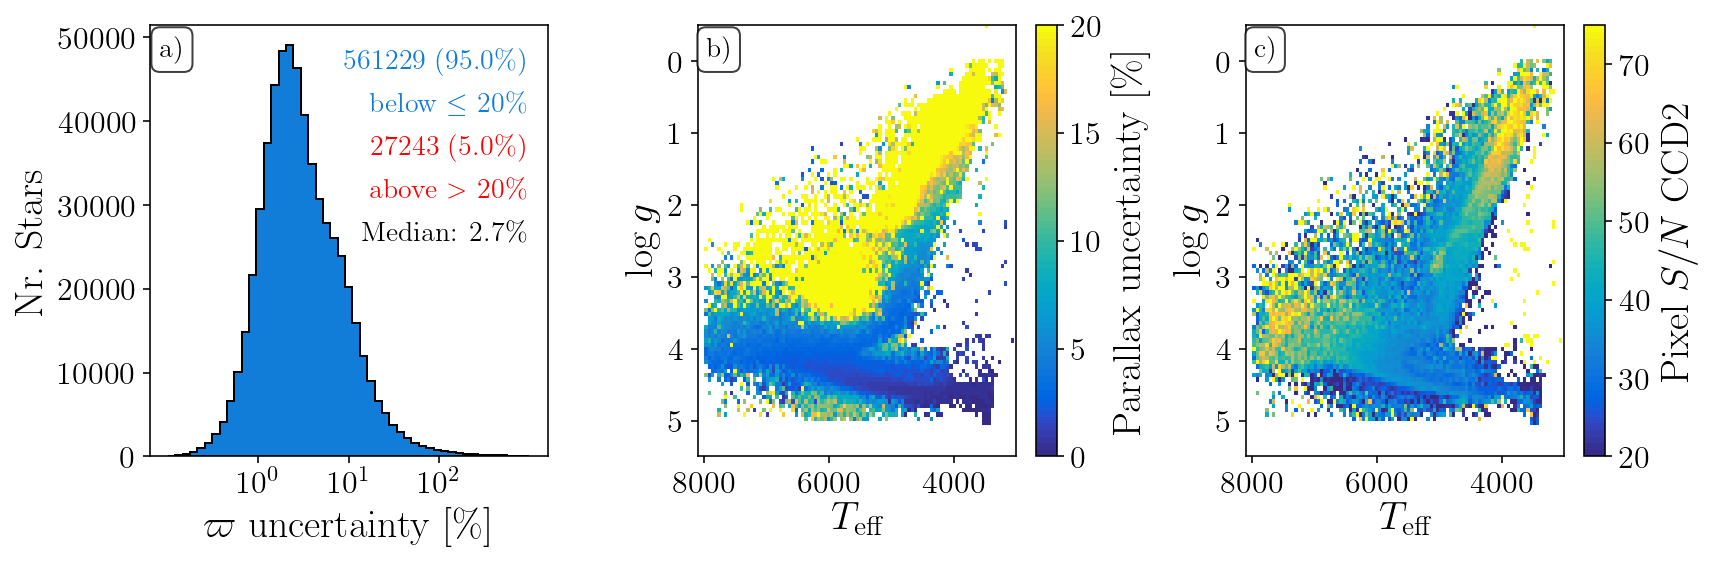

In [20]:
def plot_distance_tefflogg_distance_snr():
    """
    We plot 3 panels
    a) parallax quality, with bad measurments stacked at 15\% uncertainty
    b) a CMD for Gaia colors
    c) a CMD for 2MASS colors
    """
    
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))
    
    # select stars with finite parallax and Bailer-Jones distance

    finite_parallax = (
        np.isfinite(dr3['parallax']) & 
        (dr3['parallax']!=0.) & 
        np.isfinite(dr3['r_est'])
        )

    # Only a small portion of the parallaxes are bad. We are thus stacking those with uncertainties above 15\% at the end
    plx_uncertainty = np.array(100.*np.abs(dr3['parallax_error'][finite_parallax]/dr3['parallax'][finite_parallax]))
    stack_at_end = plx_uncertainty.clip(max=15);

    below_20 = plx_uncertainty[plx_uncertainty<20]
    above_20 = plx_uncertainty[plx_uncertainty>=20]

    dist = dr3['r_est']
    dist_stacked = dist.clip(max = 4000)
    dist_stacked[dist_stacked<4000] = -1
    dist_stacked[dist_stacked==4000] = 4001
    
    within_4kpc = np.where((dist > 0) & (dist <= 4000))[0]
    print('within 4 kpc',len(within_4kpc),'outside [%]',"{:.1f}".format(100-100*len(within_4kpc)/len(dist)))
        
    ax1.hist(
        plx_uncertainty,rasterized=True,
        bins=np.logspace(-1,3,50),color=willi_blau,histtype='stepfilled',ec='k',zorder=2
        )
    ax1.set_xscale('log')
    ax1.set_ylabel('Nr. Stars')
    ax1.set_xlabel(r'$\varpi$ uncertainty [\%]')
    #ax1.text(0.8,0.9,str(len(stack_at_end[stack_at_end<15]))+' $\leq$ 15\%',c=willi_blau,transform=ax1.transAxes,ha='right')
    #ax1.text(0.8,0.8,str(len(stack_at_end[stack_at_end==15]))+' $>$ 15\%',c='r',transform=ax1.transAxes,ha='right')
    ax1.text(0.95,0.9,str(len(below_20))+' ('+str(np.round(100*len(below_20)/len(plx_uncertainty)))+'\%)',c=willi_blau,transform=ax1.transAxes,ha='right',fontsize=14)
    ax1.text(0.95,0.8,r'below $\leq$ 20\%',c=willi_blau,transform=ax1.transAxes,ha='right',fontsize=14)
    ax1.text(0.95,0.7,str(len(above_20))+' ('+str(np.round(100*len(above_20)/len(plx_uncertainty)))+'\%)',c='r',transform=ax1.transAxes,ha='right',fontsize=14)
    ax1.text(0.95,0.6,r'above $>$ 20\%',c='r',transform=ax1.transAxes,ha='right',fontsize=14)
    ax1.text(0.95,0.5,'Median: '+"{:.1f}".format(np.median(plx_uncertainty))+r'\%',c='k',transform=ax1.transAxes,ha='right',fontsize=14)

    finite_parallax = (
    np.isfinite(dr3['parallax']) & 
    (dr3['parallax']!=0.) & 
    np.isfinite(dr3['r_est']) &
    (dr3['flag_sp'] < 257)
    )

    # Only a small portion of the parallaxes are bad. We are thus stacking those with uncertainties above 15\% at the end
    plx_uncertainty = np.array(100.*np.abs(dr3['parallax_error'][finite_parallax]/dr3['parallax'][finite_parallax]))
    
    teff_bins = (3000,8100)
    logg_bins = (-0.5,5.5)
    
    hist_kwargs_mean_value = dict(
        reduce_fn='mean',
        bins = (
            np.linspace(teff_bins[0],teff_bins[1],100),
            np.linspace(logg_bins[0],logg_bins[1],100),
        ),
        cmap = parula,
        cmin = 1,
        rasterized = True,
        zorder=2
    )

    s2 = plot_density(
        dr3['teff'][finite_parallax],
        dr3['logg'][finite_parallax],
        weights = plx_uncertainty,
        ax = ax2,vmin=0,vmax=20,
        **hist_kwargs_mean_value
        )

    s3 = plot_density(
        dr3['teff'][finite_parallax],
        dr3['logg'][finite_parallax],
        weights = dr3['snr_c2_iraf'][finite_parallax],
        ax = ax3,vmin=20,vmax=75,
        **hist_kwargs_mean_value
        )
    
    c2 = plt.colorbar(s2,ax=ax2)
    c2.set_label('Parallax uncertainty [\%]')
    c3 = plt.colorbar(s3,ax=ax3)
    c3.set_label('Pixel $S/N$ CCD2')
    
    ax2.set_xlabel(r'$T_\text{eff}$')
    ax2.set_ylabel(r'$\log g$')
    ax3.set_xlabel(r'$T_\text{eff}$')
    ax3.set_ylabel(r'$\log g$')

    ax2.set_xlim(teff_bins[1],teff_bins[0])
    ax3.set_xlim(teff_bins[1],teff_bins[0])
    ax2.set_ylim(logg_bins[1],logg_bins[0])
    ax3.set_ylim(logg_bins[1],logg_bins[0])
    
    props = dict(boxstyle='round', facecolor='w', alpha=0.75)
    ax1.text(0.025, 0.975, 'a)', transform=ax1.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    ax2.text(0.025, 0.975, 'b)', transform=ax2.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    ax3.text(0.025, 0.975, 'c)', transform=ax3.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    ax1.set_xticks([1,10,100])
    plt.tight_layout(h_pad=0)

    return(fig)

fig = plot_distance_tefflogg_distance_snr()
fig.savefig('../../dr3_release_paper/figures/plot_distance_tefflogg_distance_snr.png',dpi=200,bbox_inches='tight')

In [25]:
dwarfs = (dr3['teff'] >= 5500) | (dr3['ks_m']-5*np.log10(dr3['r_est']/10.) > 2.)
dwarfs_10pc = dwarfs & (dr3['parallax']/dr3['parallax_error'] > 10.)
giants = (dr3['teff'] < 5500) & (dr3['ks_m']-5*np.log10(dr3['r_est']/10.) < 2.)
giants_10pc = giants & (dr3['parallax']/dr3['parallax_error'] > 10.)

print(len(dr3['teff'][dwarfs_10pc]),len(dr3['teff'][dwarfs]),100*len(dr3['teff'][dwarfs_10pc])/len(dr3['teff'][dwarfs]))
print(len(dr3['teff'][giants_10pc]),len(dr3['teff'][giants]),100*len(dr3['teff'][giants_10pc])/len(dr3['teff'][giants]))

369227 383088 96.38177129014743
140840 200927 70.09510916900167


In [21]:
# Compute GALAH RZ XY coordinates

galah_finite = np.isfinite(dr3['r_est']) & np.isfinite(dr3['rv_galah'])

#Galactocentric Cartesian coordinates:
galah_x_kpc = dr3['X_XYZ'][galah_finite]
galah_y_kpc = dr3['Y_XYZ'][galah_finite]

#Galactocentric Cartesian velocities:
galah_u_kms = dr3['U_UVW'][galah_finite]
galah_v_kms = dr3['V_UVW'][galah_finite]
galah_w_kms = dr3['W_UVW'][galah_finite]

galah_R_kpc   = dr3['R_Rzphi'][galah_finite]
galah_phi_rad = dr3['phi_Rzphi'][galah_finite]
galah_z_kpc   = dr3['z_Rzphi'][galah_finite]

In [22]:
# Compute APOGEE RZ XY coordinates

apogee_finite = (apogee['GAIA_R_EST'] >= 0)

#setup frame object:
o = Orbit(
    #vxvv=[ra,dec,dist,pm_ra, pm_dec,v_los],
    vxvv=[
        apogee['RA'][apogee_finite]*u.deg,
        apogee['DEC'][apogee_finite]*u.deg, 
        apogee['GAIA_R_EST'][apogee_finite]*u.pc, 
        apogee['GAIA_PMRA'][apogee_finite]*u.mas/u.yr, 
        apogee['GAIA_PMDEC'][apogee_finite]*u.mas/u.yr, 
        apogee['VHELIO_AVG'][apogee_finite]*u.km/u.s
    ],
    ro=r_galactic_centre,
    vo=v_circular,
    zo=z_galactic_plane,
    solarmotion=[-11.1, 15.17, 7.25]*u.km/u.s,
    radec=True
)

#Galactocentric Cartesian coordinates:
apogee_x_kpc = o.helioX()
apogee_y_kpc = o.helioY()

apogee_R_kpc   = o.R()
apogee_phi_rad = o.phi()
apogee_z_kpc   = o.z()

In [23]:
# Compute LAMOST RZ XY coordinates

lamost_finite = (lamost['r_est'] >= 0)

#setup frame object:
o = Orbit(
    #vxvv=[ra,dec,dist,pm_ra, pm_dec,v_los],
    vxvv=[
        np.array(lamost['RA'][lamost_finite])*u.deg, 
        np.array(lamost['DEC'][lamost_finite])*u.deg, 
        np.array(lamost['r_est'][lamost_finite])*u.pc, 
        np.array(lamost['pmra'][lamost_finite])*u.mas/u.yr, 
        np.array(lamost['pmdec'][lamost_finite])*u.mas/u.yr, 
        np.array(lamost['RV'][lamost_finite])*u.km/u.s
    ],
    ro=r_galactic_centre,
    vo=v_circular,
    zo=z_galactic_plane,
    solarmotion=[-11.1, 15.17, 7.25]*u.km/u.s,
    radec=True
)

#Galactocentric Cartesian coordinates:
lamost_x_kpc = o.helioX()
lamost_y_kpc = o.helioY()

lamost_R_kpc   = o.R()
lamost_phi_rad = o.phi()
lamost_z_kpc   = o.z()


In [24]:
def plot_GALAH_xy(f, ax1, ax2, ax3):

    x_bins = (-15,15)
    y_bins = (-15,15)

    kwargs_hist = dict(cmap=parula, bins=(np.linspace(x_bins[0],x_bins[1],100),np.linspace(y_bins[0],y_bins[1],100)))

    p,x,y,s1 = ax1.hist2d(
        galah_x_kpc,
        galah_y_kpc,
        norm=LogNorm(),cmin=1,
        **kwargs_hist
    )
    p,x,y,s2 = ax2.hist2d(
        apogee_x_kpc,
        apogee_y_kpc,
        norm=LogNorm(),cmin=1,
        **kwargs_hist
    )
    p,x,y,s3 = ax3.hist2d(
        lamost_x_kpc,
        lamost_y_kpc,
        norm=LogNorm(),cmin=1,
        **kwargs_hist
    )

#     ax1.set_title('GALAH+~DR3',fontsize=25)
#     ax2.set_title('APOGEE DR16',fontsize=25)
#     ax3.set_title('LAMOST DR5 VAC',fontsize=25)

    ax1.set_xlabel(r'$\mathrm{X_\odot}$ [kpc]')
    ax2.set_xlabel(r'$\mathrm{X_\odot}$ [kpc]')
    ax3.set_xlabel(r'$\mathrm{X_\odot}$ [kpc]')

    ax1.set_ylabel(r'$\mathrm{Y_\odot}$ [kpc]')
#     ax2.set_ylabel(r'$\mathrm{Y_{GC}}$ [kpc]')
#     ax3.set_ylabel(r'$\mathrm{Y_{GC}}$ [kpc]')

    ax1.set_xlim(x_bins[0],x_bins[1])
    ax2.set_xlim(x_bins[0],x_bins[1])
    ax3.set_xlim(x_bins[0],x_bins[1])

    ax1.set_ylim(y_bins[0],y_bins[1])
    ax2.set_ylim(y_bins[0],y_bins[1])
    ax3.set_ylim(y_bins[0],y_bins[1])

    c1 = plt.colorbar(s1, ax=ax1)
    c2 = plt.colorbar(s2, ax=ax2)
    c3 = plt.colorbar(s3, ax=ax3)
#     c1.set_label('Nr. Spectra')
#     c2.set_label('Nr. Spectra')
    c3.set_label('Nr. Spectra')

    line_kwargs = dict(c='r',ls='dashed',lw=1)

    ax1.axhline(0,**line_kwargs)
    ax2.axhline(0,**line_kwargs)
    ax3.axhline(0,**line_kwargs)

    ax1.axvline(0,**line_kwargs)
    ax2.axvline(0,**line_kwargs)
    ax3.axvline(0,**line_kwargs)

    props = dict(boxstyle='round', facecolor='w', alpha=0.75)
    ax1.text(0.025, 0.975, 'a)', transform=ax1.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    ax2.text(0.025, 0.975, 'b)', transform=ax2.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    ax3.text(0.025, 0.975, 'c)', transform=ax3.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    plt.tight_layout()
#     plt.savefig('../../dr3_release_paper/figures/GAL_xy.png',dpi=300,bbox_inches='tight')

    return(f)

In [25]:
def plot_GAL_rz(f, ax1, ax2, ax3):

    R_bins = (-1,20)
    z_bins = (-10,10)

    kwargs_hist = dict(cmap=parula, bins=(np.linspace(R_bins[0],R_bins[1],100),np.linspace(z_bins[0],z_bins[1],100)))

    p,x,y,s1 = ax1.hist2d(
        galah_R_kpc,
        galah_z_kpc,
        norm=LogNorm(),cmin=1,
        **kwargs_hist
    )
    p,x,y,s2 = ax2.hist2d(
        apogee_R_kpc,
        apogee_z_kpc,
        norm=LogNorm(),cmin=1,
        **kwargs_hist
    )
    p,x,y,s3 = ax3.hist2d(
        lamost_R_kpc,
        lamost_z_kpc,
        norm=LogNorm(),cmin=1,
        **kwargs_hist
    )

#     ax1.set_title('GALAH+~DR3',fontsize=25)
#     ax2.set_title('APOGEE DR16',fontsize=25)
#     ax3.set_title('LAMOST DR5 VAC',fontsize=25)

    ax1.set_xlabel(r'$\mathrm{R_{GC}}$ [kpc]')
    ax2.set_xlabel(r'$\mathrm{R_{GC}}$ [kpc]')
    ax3.set_xlabel(r'$\mathrm{R_{GC}}$ [kpc]')

    ax1.set_ylabel(r'$\mathrm{z_{GC}}$ [kpc]')
#     ax2.set_ylabel(r'$\mathrm{z_{GC}}$ [kpc]')
#     ax3.set_ylabel(r'$\mathrm{z_{GC}}$ [kpc]')

    ax1.set_xlim(R_bins[0],R_bins[1])
    ax2.set_xlim(R_bins[0],R_bins[1])
    ax3.set_xlim(R_bins[0],R_bins[1])

    ax1.set_ylim(z_bins[0],z_bins[1])
    ax2.set_ylim(z_bins[0],z_bins[1])
    ax3.set_ylim(z_bins[0],z_bins[1])

    c1 = plt.colorbar(s1, ax=ax1)
    c2 = plt.colorbar(s2, ax=ax2)
    c3 = plt.colorbar(s3, ax=ax3)
#     c1.set_label('Nr. Spectra')
#     c2.set_label('Nr. Spectra')
    c3.set_label('Nr. Spectra')

    line_kwargs = dict(c='r',ls='dashed',lw=1)

    ax1.axhline(0,**line_kwargs)
    ax2.axhline(0,**line_kwargs)
    ax3.axhline(0,**line_kwargs)

    ax1.axvline(r_galactic_centre.value,**line_kwargs)
    ax2.axvline(r_galactic_centre.value,**line_kwargs)
    ax3.axvline(r_galactic_centre.value,**line_kwargs)

    props = dict(boxstyle='round', facecolor='w', alpha=0.75)
    ax1.text(0.025, 0.975, 'd)', transform=ax1.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    ax2.text(0.025, 0.975, 'e)', transform=ax2.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    ax3.text(0.025, 0.975, 'f)', transform=ax3.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    plt.tight_layout()
#     plt.savefig('../../dr3_release_paper/figures/GAL_rz.png',dpi=300,bbox_inches='tight')

    return(f)

In [26]:
def plot_GAL_kiel(f, ax1, ax2, ax3):

    teff_bins = (3000,8100)
    logg_bins = (-0.5,5.5)

    kwargs_hist = dict(cmap=parula, bins=(np.linspace(teff_bins[0],teff_bins[1],100),np.linspace(logg_bins[0],logg_bins[1],100)))

    p,x,y,s1 = ax1.hist2d(
        dr3['teff'][good_galah],
        dr3['logg'][good_galah],
        norm=LogNorm(),cmin=1,
        **kwargs_hist
    )
    p,x,y,s2 = ax2.hist2d(
        apogee['TEFF'][good_apogee],
        apogee['LOGG'][good_apogee],
        norm=LogNorm(),cmin=1,
        **kwargs_hist
    )
    p,x,y,s3 = ax3.hist2d(
        lamost['TEFF'][good_lamost],
        lamost['LOGG'][good_lamost],
        norm=LogNorm(),cmin=10,
        **kwargs_hist
    )
    ax1.set_xlim(teff_bins[1],teff_bins[0])
    ax2.set_xlim(teff_bins[1],teff_bins[0])
    ax3.set_xlim(teff_bins[1],teff_bins[0])

    ax1.set_ylim(logg_bins[1],logg_bins[0])
    ax2.set_ylim(logg_bins[1],logg_bins[0])
    ax3.set_ylim(logg_bins[1],logg_bins[0])

    ax1.set_xlabel(r'$T_\text{eff}$')
    ax2.set_xlabel(r'$T_\text{eff}$')
    ax3.set_xlabel(r'$T_\text{eff}$')

    ax1.set_ylabel(r'$\log g$')
#     ax2.set_ylabel(r'$\log g$')
#     ax3.set_ylabel(r'$\log g$')

    c1 = plt.colorbar(s1, ax=ax1)
    c2 = plt.colorbar(s2, ax=ax2)
    c3 = plt.colorbar(s3, ax=ax3, extend='min')
#     c1.set_label('Nr. Spectra')
#     c2.set_label('Nr. Spectra')
    c3.set_label('Nr. Spectra')

    props = dict(boxstyle='round', facecolor='w', alpha=0.75)
    ax1.text(0.025, 0.975, 'g)', transform=ax1.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    ax2.text(0.025, 0.975, 'h)', transform=ax2.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    ax3.text(0.025, 0.975, 'i)', transform=ax3.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    plt.tight_layout()
    
#     plt.savefig('../../dr3_release_paper/figures/GAL_kiel.png',dpi=300,bbox_inches='tight')

    return(f)

In [27]:
def plot_GAL_alpha(f, ax1, ax2, ax3):

    feh_bins = (-2.5,0.8)
    alpha_bins = (-0.4,0.7)

    kwargs_hist = dict(cmap=parula, bins=(np.linspace(feh_bins[0],feh_bins[1],100),np.linspace(alpha_bins[0],alpha_bins[1],100)))

    p,x,y,s1 = ax1.hist2d(
        dr3['fe_h'][good_galah],
        dr3['alpha_fe'][good_galah],
        norm=LogNorm(),cmin=1,
        **kwargs_hist
    )
    p,x,y,s2 = ax2.hist2d(
        apogee['FE_H'][good_apogee],
        apogee['ALPHA_M'][good_apogee] + apogee['M_H'][good_apogee] - apogee['FE_H'][good_apogee],
        norm=LogNorm(),cmin=1,
        **kwargs_hist
    )
    p,x,y,s3 = ax3.hist2d(
        lamost['FEH'][good_lamost],
        lamost['ALPHA_FE'][good_lamost],
        norm=LogNorm(),cmin=10,
        **kwargs_hist
    )
    ax1.set_xlim(feh_bins[0],feh_bins[1])
    ax2.set_xlim(feh_bins[0],feh_bins[1])
    ax3.set_xlim(feh_bins[0],feh_bins[1])

    ax1.set_ylim(alpha_bins[0],alpha_bins[1])
    ax2.set_ylim(alpha_bins[0],alpha_bins[1])
    ax3.set_ylim(alpha_bins[0],alpha_bins[1])

#     ax1.set_title('GALAH+~DR3',fontsize=25)
#     ax2.set_title('APOGEE DR16',fontsize=25)
#     ax3.set_title('LAMOST DR5 VAC',fontsize=25)

    ax1.set_xlabel(r'[Fe/H]')
    ax2.set_xlabel(r'[Fe/H]')
    ax3.set_xlabel(r'[Fe/H]')

    ax1.set_ylabel(r'[$\alpha$/Fe]')
#     ax2.set_ylabel(r'[$\alpha$/Fe]')
#     ax3.set_ylabel(r'[$\alpha$/Fe]')

    c1 = plt.colorbar(s1, ax=ax1)
    c2 = plt.colorbar(s2, ax=ax2)
    c3 = plt.colorbar(s3, ax=ax3, extend='min')
#     c1.set_label('Nr. Spectra')
#     c2.set_label('Nr. Spectra')
    c3.set_label('Nr. Spectra')

    line_kwargs = dict(c='r',ls='dashed',lw=1)

    ax1.axhline(0,**line_kwargs)
    ax2.axhline(0,**line_kwargs)
    ax3.axhline(0,**line_kwargs)

    ax1.axvline(0,**line_kwargs)
    ax2.axvline(0,**line_kwargs)
    ax3.axvline(0,**line_kwargs)
    
    props = dict(boxstyle='round', facecolor='w', alpha=0.75)
    ax1.text(0.025, 0.975, 'j)', transform=ax1.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    ax2.text(0.025, 0.975, 'k)', transform=ax2.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    ax3.text(0.025, 0.975, 'l)', transform=ax3.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    props = dict(boxstyle='round', facecolor='w', alpha=0.95)
    ax1.text(0.025, 0.025, 'Med. $S/N$: '+str(int(round(np.median(dr3['snr_c2_iraf'][good_galah])))), transform=ax1.transAxes, fontsize=14,
            verticalalignment='bottom', bbox=props)
    ax2.text(0.025, 0.025, 'Med. $S/N$: '+str(int(round(np.median(apogee['SNR'][good_apogee])))), transform=ax2.transAxes, fontsize=14,
            verticalalignment='bottom', bbox=props)
    ax3.text(0.025, 0.025, 'Med. $S/N$: '+str(int(round(np.median(lamost['SNR_G'][good_lamost])))), transform=ax3.transAxes, fontsize=14,
            verticalalignment='bottom', bbox=props)

    plt.tight_layout()
#     plt.savefig('../../dr3_release_paper/figures/GAL_alpha.png',dpi=300,bbox_inches='tight')
    return(f)

/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)



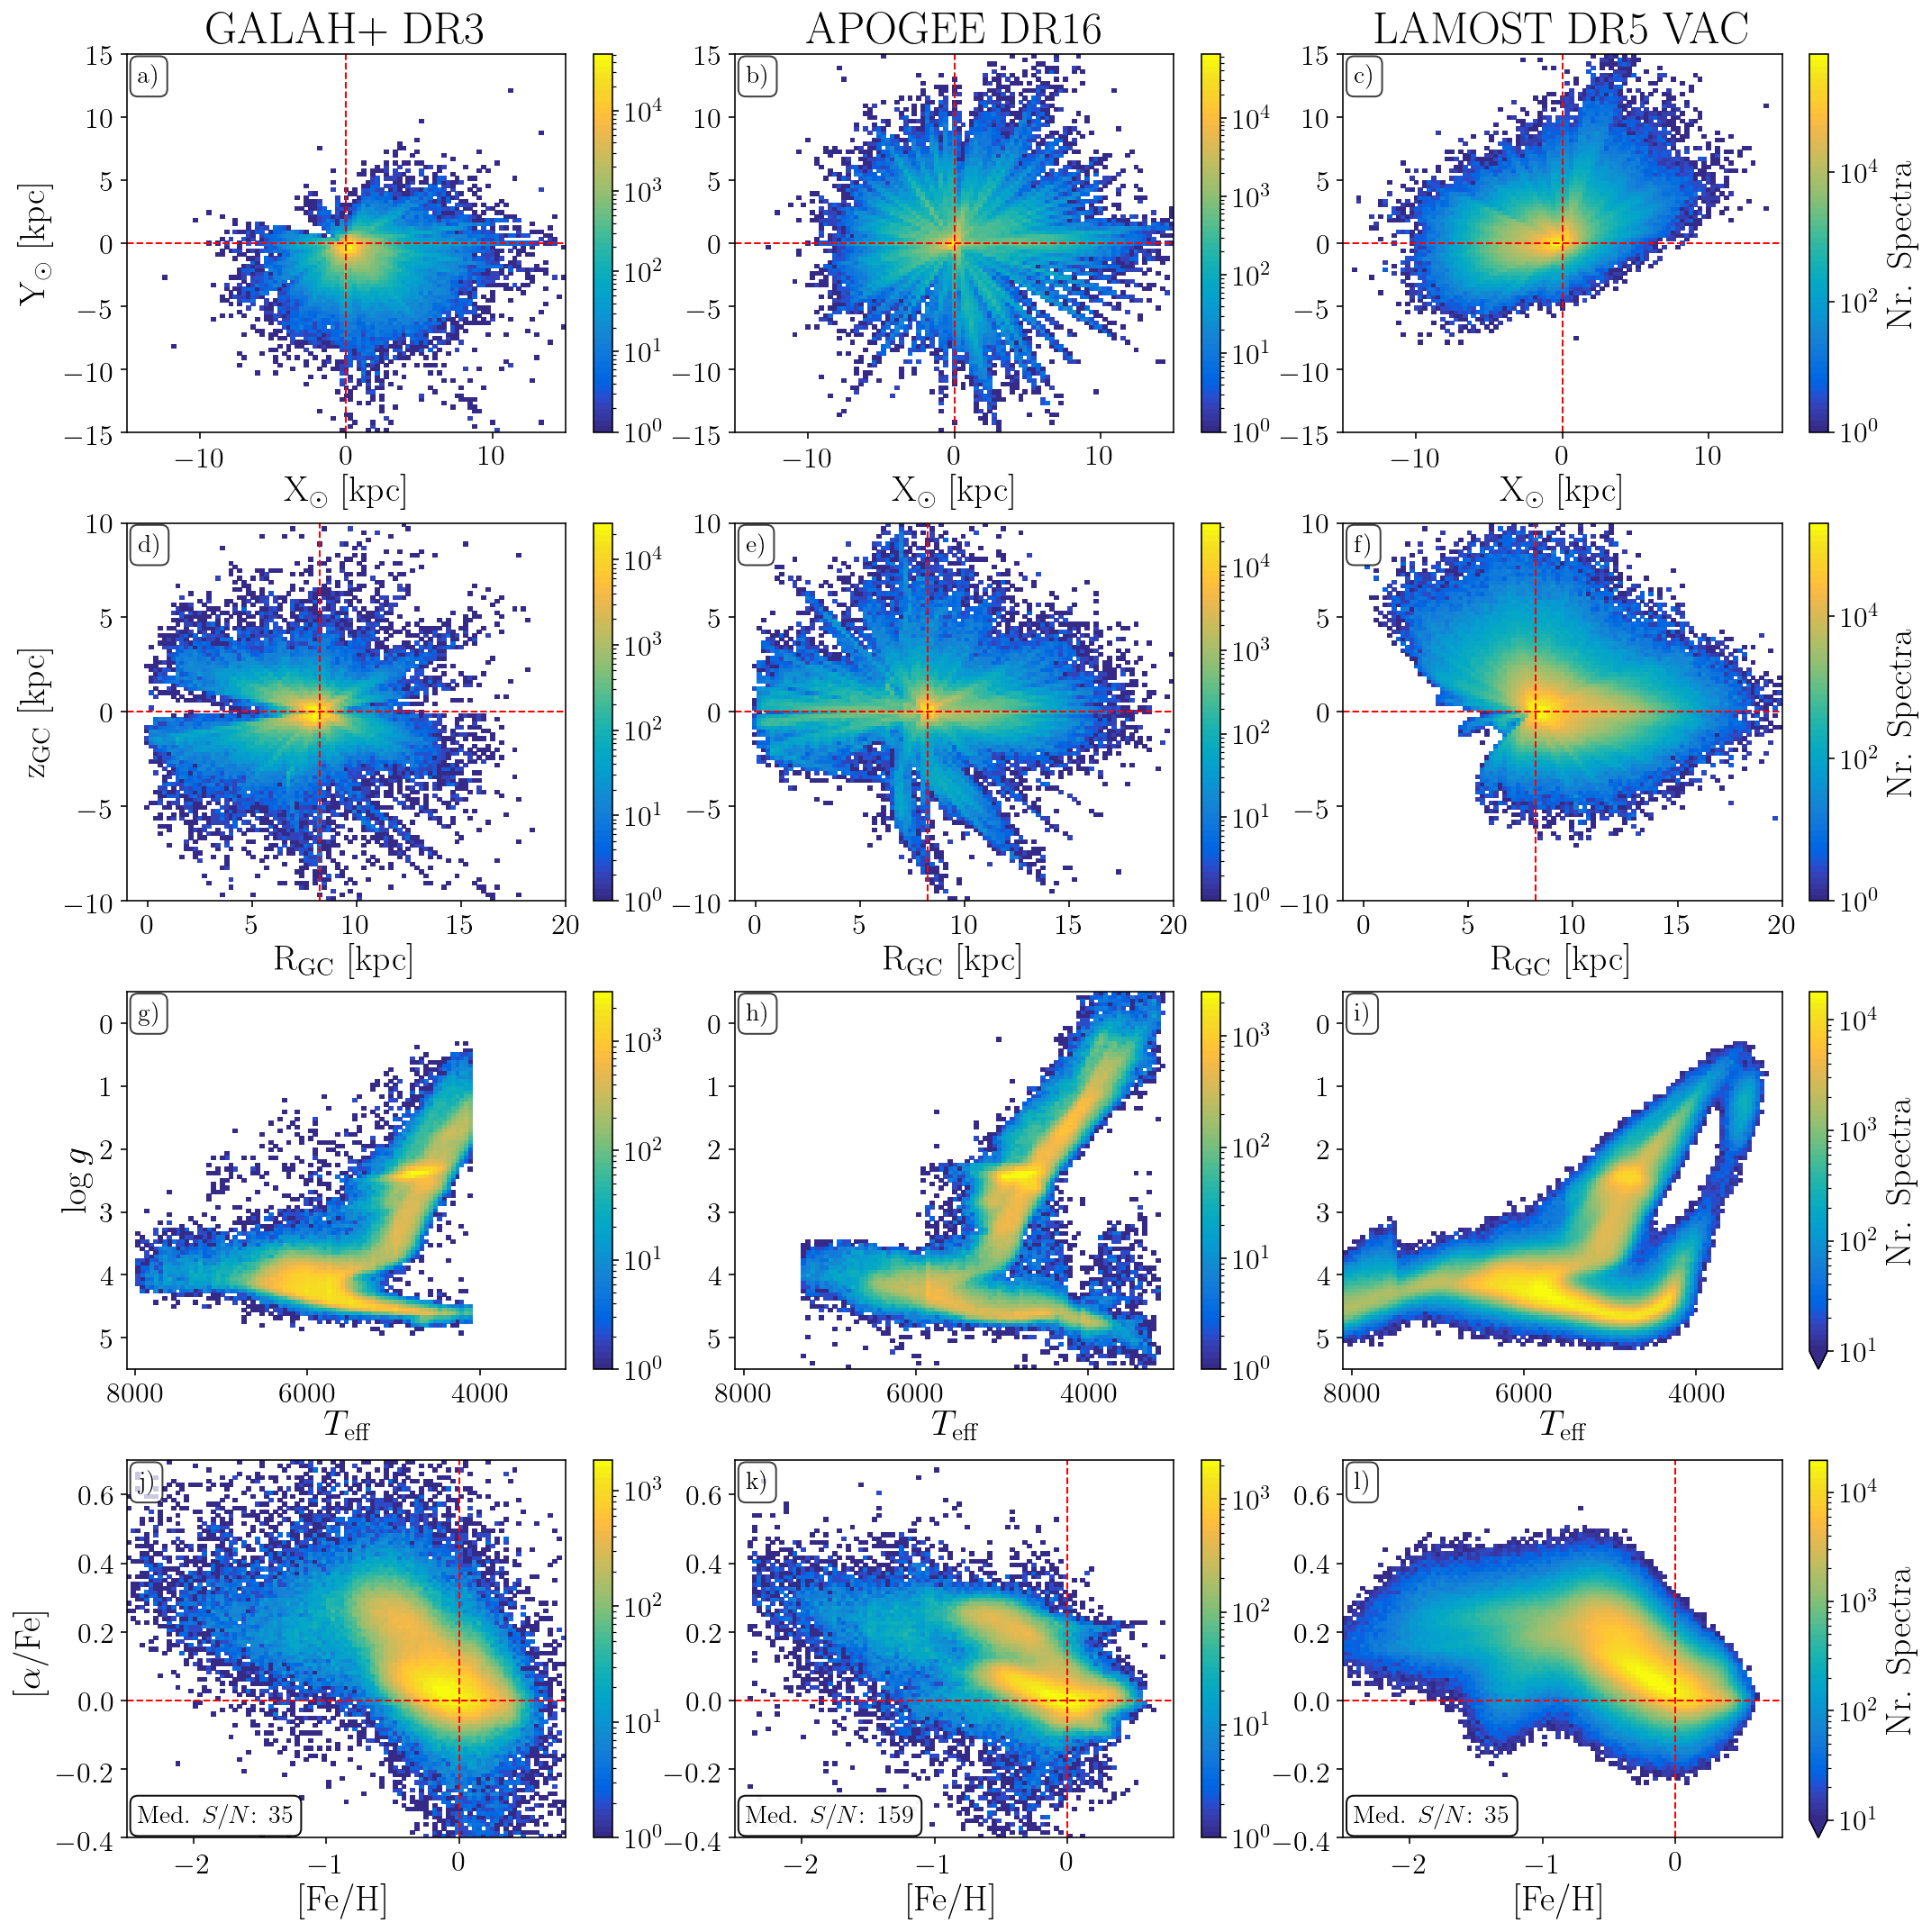

In [28]:
f, ((ax12, ax22, ax32),(ax13, ax23, ax33),(ax1, ax2, ax3),(ax14, ax24, ax34)) = plt.subplots(4,3,figsize=(15,15))

ax12.set_title('GALAH+~DR3',fontsize=25)
ax22.set_title('APOGEE DR16',fontsize=25)
ax32.set_title('LAMOST DR5 VAC',fontsize=25)

f = plot_GALAH_xy(f, ax12, ax22, ax32)
f = plot_GAL_rz(f, ax13, ax23, ax33)
f = plot_GAL_kiel(f, ax1, ax2, ax3)
f = plot_GAL_alpha(f, ax14, ax24, ax34)
plt.tight_layout(h_pad=0,w_pad=0)
plt.savefig('../../dr3_release_paper/figures/GALAHDR3_APOGEEDR16_LAMOSTDR5VAC.png',dpi=300,bbox_inches='tight')

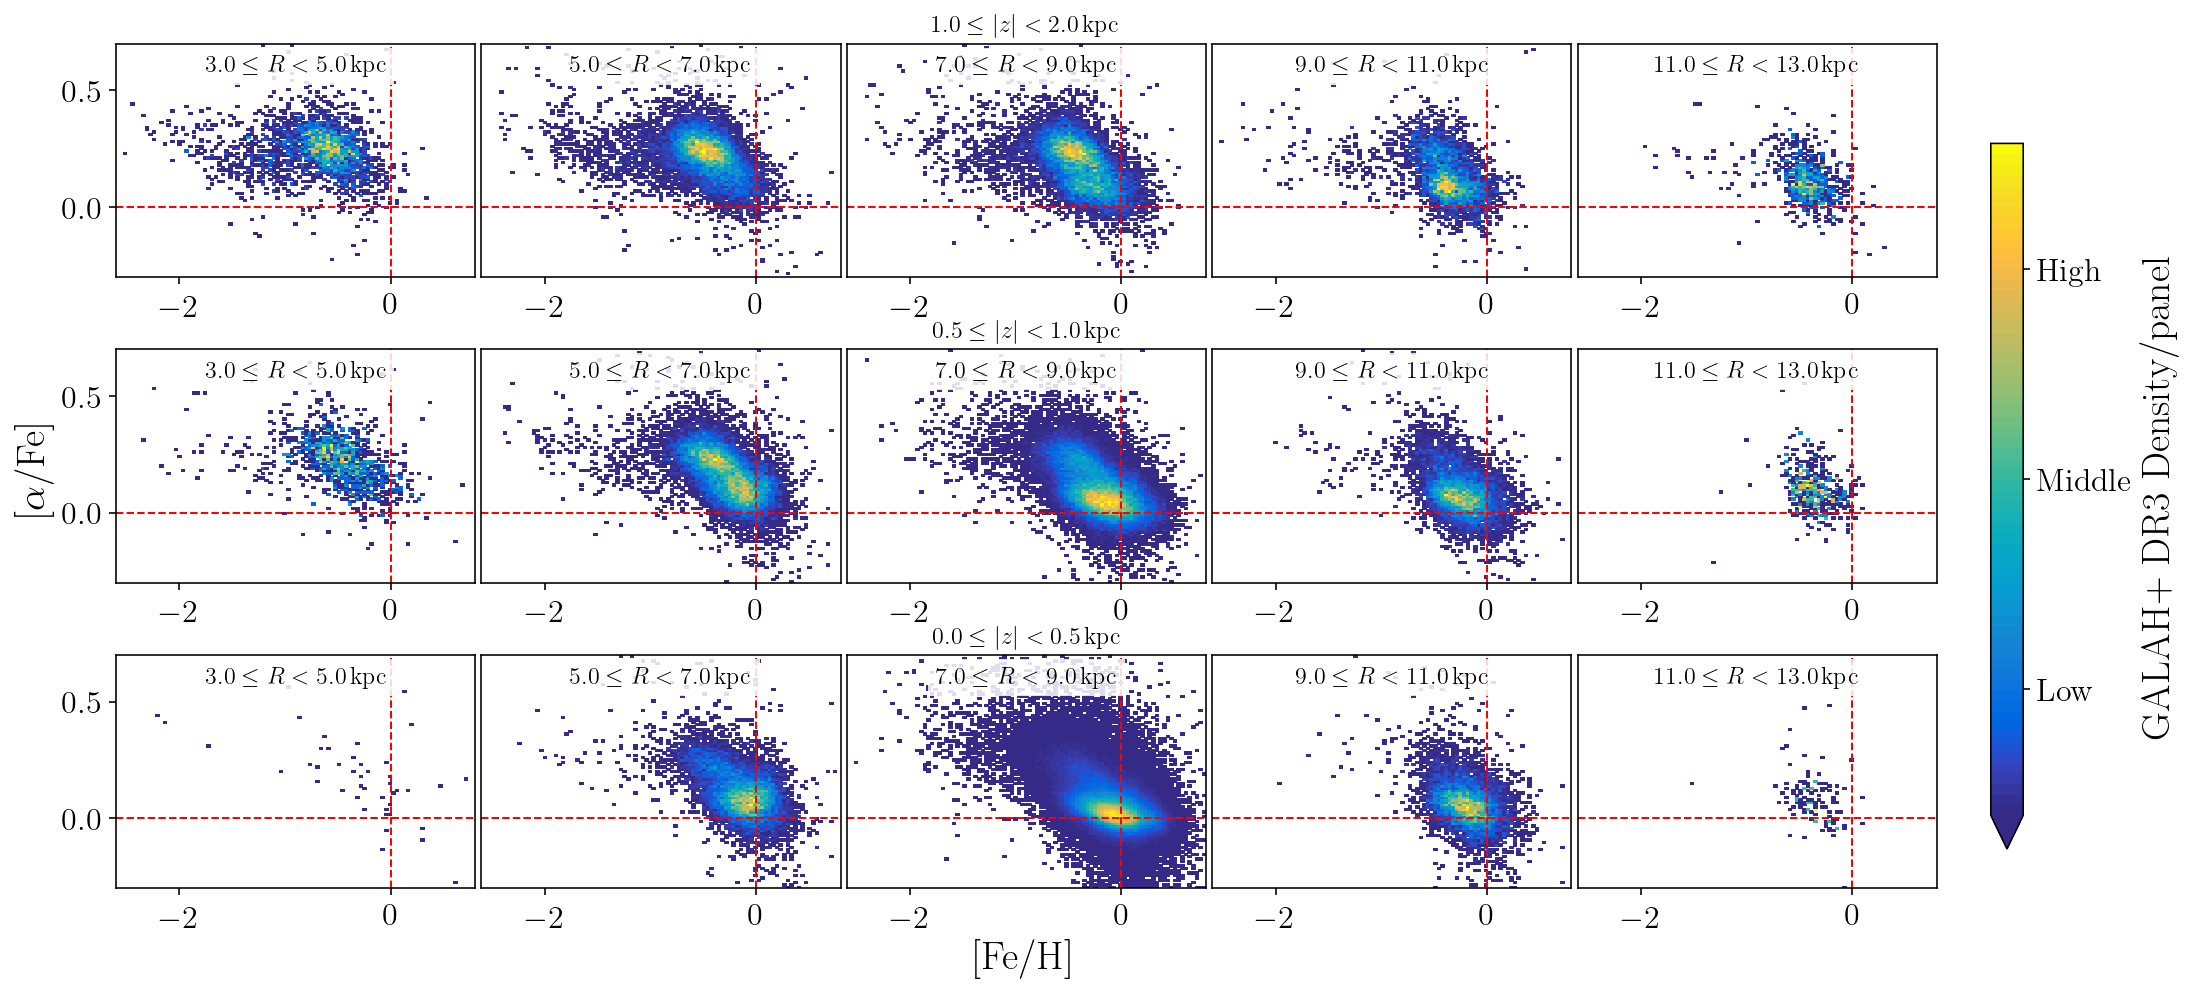

In [29]:
def plot_Rz_fehalpha():

    f, gs = plt.subplots(3,5,figsize=(15,7))

    for row,(z_min,z_max) in enumerate(zip([0,0.5,1.0],[0.5,1.0,2.0])):
    
        for col,(r_min,r_max) in enumerate(zip(np.arange(3,11.1,2),np.arange(5,13.1,2))):
    
            ax=gs[2-row,col]

            in_bin = (
                (dr3['flag_sp'][galah_finite] == 0) &
                (dr3['flag_alpha_fe'][galah_finite] == 0) &
                (galah_R_kpc >= r_min) &
                (galah_R_kpc < r_max) &
                (np.abs(galah_z_kpc) >= z_min) &
                (np.abs(galah_z_kpc) < z_max)
                )
        
            p,x,y,s = ax.hist2d(
                dr3['fe_h'][galah_finite][in_bin],
                dr3['alpha_fe'][galah_finite][in_bin],
                bins = (
                    np.linspace(-2.6,0.8,100),
                    np.linspace(-0.3,0.7,100)
                ),
                cmin=1,cmap=parula
            )
            props = dict(facecolor='w', edgecolor='None', alpha=0.85)   
            ax.text(0.5,0.878,r'$'+"{:.1f}".format(r_min)+' \leq R < '+"{:.1f}".format(r_max)+'\,\mathrm{kpc}$',fontsize=12,transform=ax.transAxes,ha='center',bbox=props)
            if col != 0:
                ax.set_yticks([])
            if ((row == 0) & (col == 2)):
                ax.set_xlabel(r'[Fe/H]')
            if ((row == 1) & (col == 0)):
                ax.set_ylabel(r'[$\alpha$/Fe]')
            if col == 2:
                ax.set_title(r'$'+"{:.1f}".format(z_min)+' \leq \\vert z \\vert < '+"{:.1f}".format(z_max)+'\,\mathrm{kpc}$')

            kwargs_axv = dict(c='r',ls='dashed',lw=1,zorder=2)
            ax.axvline(0,**kwargs_axv)
            ax.axhline(0,**kwargs_axv)

    plt.tight_layout(h_pad=0,w_pad=0)
    f.subplots_adjust(right=0.9)
    cbar_ax = f.add_axes([0.925, 0.15, 0.015, 0.7])
    c = f.colorbar(s, cax=cbar_ax,extend='min')
    c.ax.locator_params(nbins=3)
    c.ax.set_yticklabels(['Low', 'Middle','High'])
    c.set_label('GALAH+~DR3~Density/panel')
    
    plt.savefig('../../dr3_release_paper/figures/RZ_alpha.png',bbox_inches='tight',dpi=200)

plot_Rz_fehalpha()

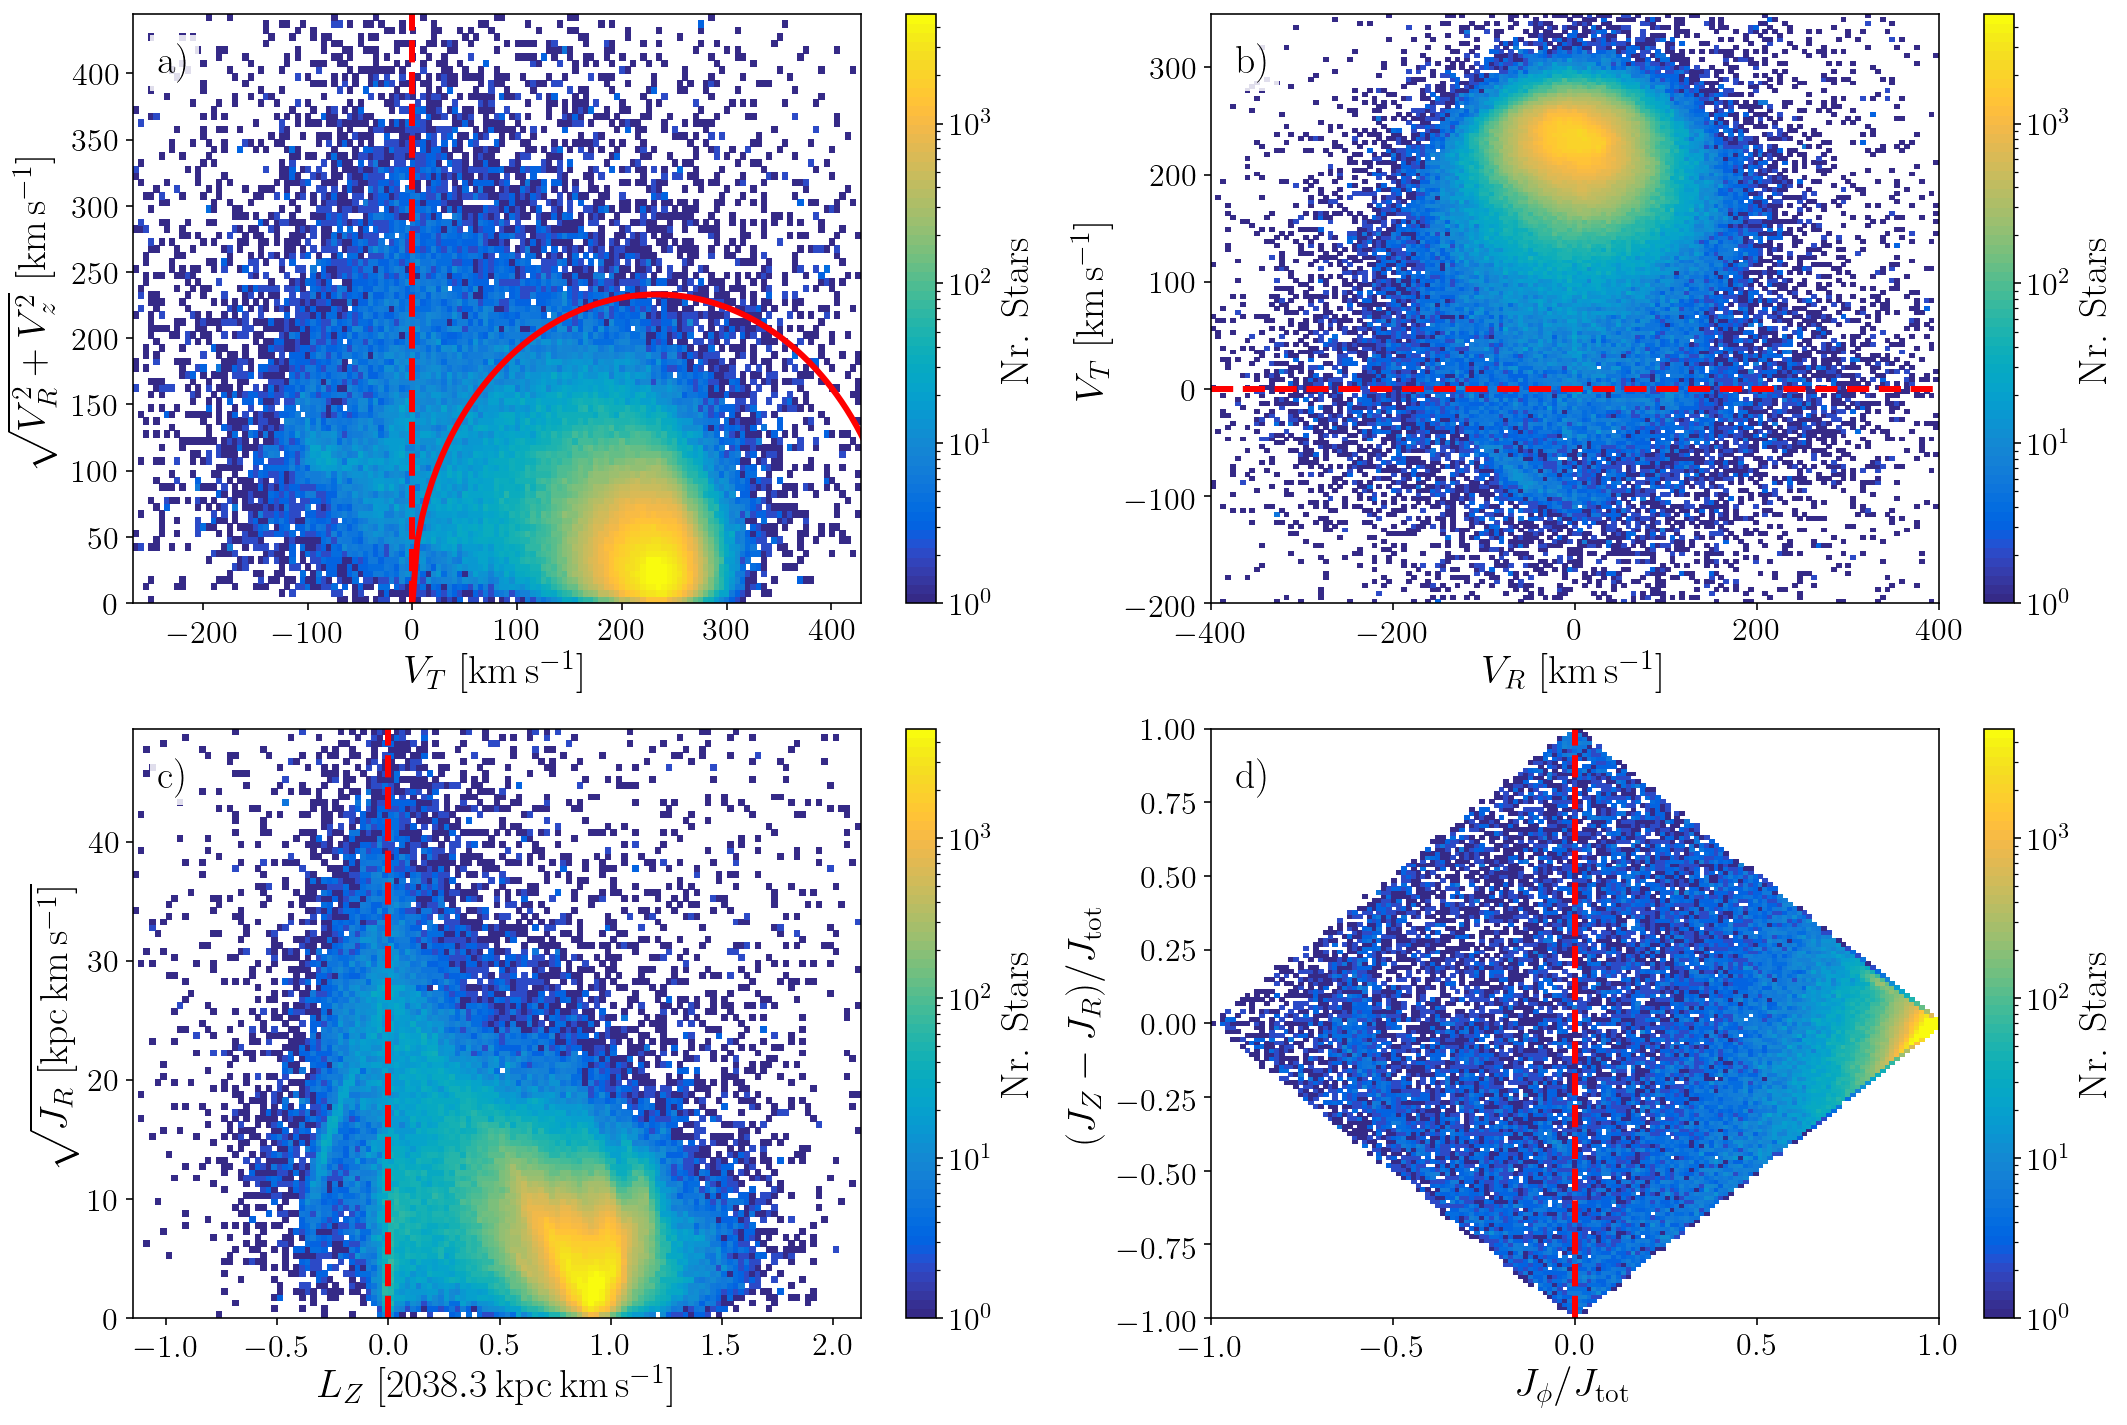

In [30]:
def plot_dynamics_overview():
    """
    This function plots the overview of GALAH+ DR3 stellar kinematics and dynamics
    """

    # First create a figure "f", with an array 2x2 grid of subplots "gs"
    f, gs = plt.subplots(2, 2, figsize=(15,10))

    # For the plotting, we can define keyword arguments, that the matplotlib
    kwargs_hist2d = dict(
        cmin=1,
        cmap=parula,
        norm=LogNorm(),
        rasterized=True
        )

    # You can iterate over the array entries, or just refer to them individually
    ax1 = gs[0,0]
    ax2 = gs[1,0]
    ax3 = gs[0,1]
    ax4 = gs[1,1]

    good_dynamics = np.isfinite(dr3_vac_dyn['V_UVW'])

    p1, x1, y1, s1 = ax1.hist2d(
        dr3_vac_dyn['vT_Rzphi'][good_dynamics],
        np.sqrt(dr3_vac_dyn['vR_Rzphi'][good_dynamics]**2. + dr3_vac_dyn['vz_Rzphi'][good_dynamics]**2.),
        bins = (
            np.arange(233.1-500,233.1+200,5),
            np.arange(0,450,5)
        ),
        **kwargs_hist2d
        )
    c1 = plt.colorbar(s1, ax=ax1)
    c1.set_label('Nr. Stars')

    p2, x2, y2, s2 = ax2.hist2d(
        dr3_vac_dyn['L_Z'][good_dynamics]/(2038.3),
        np.sqrt(dr3_vac_dyn['J_R'][good_dynamics]),
        bins = (
            np.arange(-1.15,2.15,0.025),
            np.arange(0,50,0.5)
        ),
        **kwargs_hist2d
        )
    c2 = plt.colorbar(s2, ax=ax2)
    c2.set_label('Nr. Stars')

    # ellipse = matplotlib.patches.Ellipse(xy = (-1.5,3150), width = 0.7, height = 1000, angle = 0.05, lw = 3, fc='None', edgecolor = 'r')
    # ax1.add_artist(ellipse)
    # ax1.text(0.26,0.7,'LMC',transform=ax1.transAxes,color='r',fontsize=20)


    p3, x3, y3, s3 = ax3.hist2d(
        dr3_vac_dyn['vR_Rzphi'][good_dynamics],
        dr3_vac_dyn['vT_Rzphi'][good_dynamics],
        bins = (
            np.linspace(-400,400,150),
            np.linspace(-200,350,150)
        ),
        **kwargs_hist2d
        )
    c3 = plt.colorbar(s3, ax=ax3)
    c3.set_label('Nr. Stars')

    p4, x4, y4, s4 = ax4.hist2d(
        dr3_vac_dyn['L_Z'][good_dynamics]/(np.abs(dr3_vac_dyn['J_R'][good_dynamics])+np.abs(dr3_vac_dyn['L_Z'][good_dynamics])+np.abs(dr3_vac_dyn['J_Z'][good_dynamics])),
        (dr3_vac_dyn['J_Z'][good_dynamics]-dr3_vac_dyn['J_R'][good_dynamics])/(np.abs(dr3_vac_dyn['J_R'][good_dynamics])+np.abs(dr3_vac_dyn['L_Z'][good_dynamics])+np.abs(dr3_vac_dyn['J_Z'][good_dynamics])),
        bins = (
            np.linspace(-1,1,150),
            np.linspace(-1,1,150)
        ),
        **kwargs_hist2d
        )
    c4 = plt.colorbar(s4, ax=ax4)
    c4.set_label('Nr. Stars')

    ax1.set_xlabel(r'$V_T~\mathrm{[km\,s^{-1}]}$')
    ax1.set_ylabel(r'$\sqrt{V_R^2 + V_z^2}~\mathrm{[km\,s^{-1}]}$')
    ax2.set_xlabel(r'$L_Z~\mathrm{[2038.3\,kpc\,km\,s^{-1}]}$')
    ax2.set_ylabel(r'$\sqrt{J_R~\mathrm{[kpc\,km\,s^{-1}]}}$')
    ax3.set_xlabel(r'$V_R~\mathrm{[km\,s^{-1}]}$')
    ax3.set_ylabel(r'$V_T~\mathrm{[km\,s^{-1}]}$')
    ax4.set_xlabel(r'$J_\phi/J_\text{tot}$')
    ax4.set_ylabel(r'$(J_Z-J_R)/J_\text{tot}$')

    ax1.axvline(0,c='r',ls='dashed',lw=3,label='$V_T = 0\,\mathrm{km\,s^{-1}}$')
    ax1.plot(np.linspace(0,2*233.1,100),np.sqrt(233.1**2-np.linspace(-233.1,233.1,100)**2),lw=3,c='r',label='$v_\mathrm{tot} = 233.1\,\mathrm{km\,s^{-1}}$')
    ax2.axvline(0,c='r',ls='dashed',lw=3,label='$L_Z = 0\,\mathrm{kpc\,km\,s^{-1}}$')
    ax3.axhline(0,c='r',ls='dashed',lw=3,label='$L_Z = 0\,\mathrm{kpc\,km\,s^{-1}}$')
    ax4.axvline(0,c='r',ls='dashed',lw=3,label='$L_Z = 0\,\mathrm{kpc\,km\,s^{-1}}$')

    props = dict(facecolor='w', edgecolor='None', alpha=0.85)   
    ax1.text(0.035,0.9,'a)',fontsize=20, transform=ax1.transAxes,bbox=props)
    ax2.text(0.035,0.9,'c)',fontsize=20, transform=ax2.transAxes,bbox=props)
    ax3.text(0.035,0.9,'b)',fontsize=20, transform=ax3.transAxes,bbox=props)
    ax4.text(0.035,0.9,'d)',fontsize=20, transform=ax4.transAxes,bbox=props)

    plt.tight_layout()
    plt.savefig('../../dr3_release_paper/figures/DR3_dynamics_overview.png',dpi=200,bbox_inches='tight')

plot_dynamics_overview()

In [31]:
all_stars = len(dr3['sobject_id'])

s10 = len(dr3['sobject_id'][(total_velocity(dr3) < 10)])
s20 = len(dr3['sobject_id'][(total_velocity(dr3) < 20)])
s50 = len(dr3['sobject_id'][(total_velocity(dr3) < 50)])
s50p = len(dr3['sobject_id'][(total_velocity(dr3) < 57.)])
s100 = len(dr3['sobject_id'][(total_velocity(dr3) < 100)])
s140 = len(dr3['sobject_id'][(total_velocity(dr3) < 140)])
s180 = len(dr3['sobject_id'][(total_velocity(dr3) < 180)])
s233 = len(dr3['sobject_id'][(total_velocity(dr3) < 233.1)])

print(100*s10/all_stars,s10)
print(100*s20/all_stars,s20)
print(100*s50/all_stars,s50)
print(100*s50p/all_stars,s50p)
print(100*s100/all_stars,s100)
print(100*s140/all_stars,100-100*s140/all_stars,s140)
print(100*s180/all_stars,100-100*s180/all_stars,s180)
print(100*s233/all_stars,100-100*s233/all_stars,s233)

retro = len(dr3['sobject_id'][dr3['vT_Rzphi'] < 0])
print(100*retro/all_stars,100-100*retro/all_stars,retro)

retro = len(dr3['sobject_id'][dr3['L_Z'] < 0])
print(100*retro/all_stars,100-100*retro/all_stars,retro)

#kinematic_halo = len(dr3['sobject_id'][(total_velocity(dr3) > 180)])



2.1173316388337176 12462
7.6865832669295635 45241
42.22855016642002 248545
50.32425994484947 296194
81.77059352227684 481278
91.9287562588031 8.071243741196895 541066
95.62278807484569 4.377211925154313 562808
97.63121186738728 2.368788132612721 574629
1.1973066970679833 98.80269330293201 7047
1.191699896868857 98.80830010313115 7014


# Dynamics colored by [X/Fe]

In [32]:
def plot_density(x, y, bins=100, range=None, normed=False, weights=None, 
                 scaling=None, reduce_fn='sum', smooth=0, ax=None, cmin=0, **kwargs):
    """
    Compute the bi-dimensional histogram of two data samples.

    Parameters
    ----------
    x : array_like, shape (N,)
        An array containing the x coordinates of the points to be
        histogrammed.
    y : array_like, shape (N,)
        An array containing the y coordinates of the points to be
        histogrammed.
    bins : int or array_like or [int, int] or [array, array], optional
        The bin specification:

        * If int, the number of bins for the two dimensions (nx=ny=bins).
        * If array_like, the bin edges for the two dimensions
            (x_edges=y_edges=bins).
        * If [int, int], the number of bins in each dimension
            (nx, ny = bins).
        * If [array, array], the bin edges in each dimension
            (x_edges, y_edges = bins).
        * A combination [int, array] or [array, int], where int
            is the number of bins and array is the bin edges.

    range : array_like, shape(2,2), optional
        The leftmost and rightmost edges of the bins along each dimension
        (if not specified explicitly in the `bins` parameters):
        ``[[xmin, xmax], [ymin, ymax]]``. All values outside of this range
        will be considered outliers and not tallied in the histogram.
    normed : bool, optional
        If False, returns the number of samples in each bin. If True,
        returns the bin density ``bin_count / sample_count / bin_area``.
    weights : array_like, shape(N,), optional
        An array of values ``w_i`` weighing each sample ``(x_i, y_i)``.
        Weights are normalized to 1 if `normed` is True. If `normed` is
        False, the values of the returned histogram are equal to the sum of
        the weights belonging to the samples falling into each bin.
    """
    import pylab as plt
    from scipy.ndimage import gaussian_filter

    ind = (np.isfinite(x) & np.isfinite(y))
    if False in ind:
        print("Warning: Not all values are finite.")
        w = weights
        if w is not None:
            w = w[ind]
        n, bx, by = plt.histogram2d(x[ind], y[ind], bins=bins, range=range, normed=normed,
                                    weights=w)
    else:
        n, bx, by = plt.histogram2d(x, y, bins=bins, range=range, normed=normed,
                                    weights=weights)

    if reduce_fn.lower() in ('average', 'mean', 'avg'):
        n0, _, _ = plt.histogram2d(x, y, bins=bins, range=range, normed=normed,
                                   weights=None)
        
        cmin_limit = (n0 < cmin)
        ind = n0 > 0
        n = n.astype(float)
        n[ind] /= n0[ind].astype(float)
    n[(n==0)] = np.nan
    n[cmin_limit] = np.nan

    defaults = dict(zorder = 2, cmap='RdYlBu_r', origin='lower', aspect='auto', rasterized=True,
                    interpolation='nearest')
    defaults.update(**kwargs)
    extent = (bx[0], bx[-1], by[0], by[-1])

    if smooth > 0:
        gaussian_filter(n, smooth, output=n)

    if ax==None:
        ax = plt.gca()
    else:
        ax=ax
        
    if scaling is None:
        scaling = 'None'
    s = scaling.lower().replace(' ', '')
    if s in (None, 'none', 'count'):
        return ax.imshow(n.T, extent=extent, **defaults)#, n
    else:
        if s in ('log', 'log(n)', 'log10', 'log(count)'):
            return ax.imshow(np.log10(n).T, extent=extent, **defaults)#, np.log10(n)
        elif s in ('log(n+1)', 'log(count+1)'):
            return ax.imshow(np.log10(n + 1).T, extent=extent, **defaults)#, np.log10(n + 1)

['Mg', 'Cu', 'Na'] 0 363368


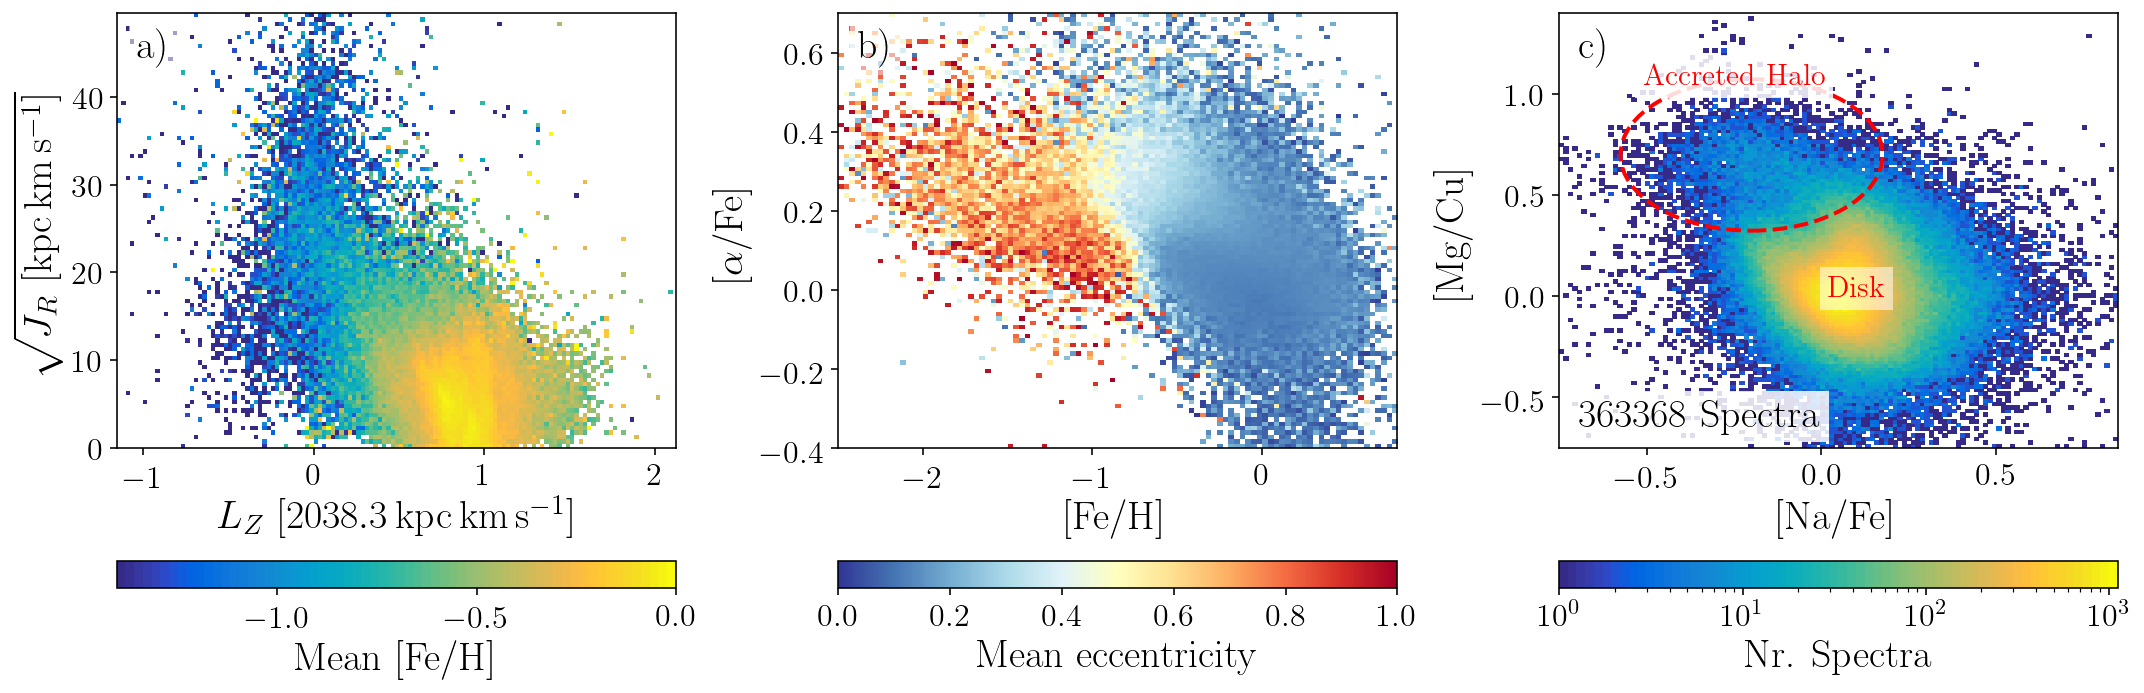

In [34]:
def plot_actions_xfe():
    
    f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))
    
    hist_kwargs_mean_value = dict(
        reduce_fn='mean',
        bins = (
            np.arange(-1.15,2.15,0.025),
            np.arange(0,50,0.5)
        ),
        vmin=-1.4,vmax=0.0,
        cmap = parula,
        cmin = 1,
        rasterized = True,
        zorder=2
    )
    
    good_dynamics = np.isfinite(dr3['ecc']) & (dr3['flag_sp'] == 0) & (dr3['flag_alpha_fe'] == 0)

    s1 = plot_density(
        dr3['L_Z'][good_dynamics]/(2038.3),
        np.sqrt(dr3['J_R'][good_dynamics]),
        weights = dr3['fe_h'][good_dynamics],
        ax = ax1,
        **hist_kwargs_mean_value
        )
    
    hist_kwargs_mean_value = dict(
        reduce_fn='mean',
        bins = (
            np.arange(-1.15,2.15,0.025),
            np.arange(0,50,0.5)
        ),
        vmin=0.0,vmax=0.4,
        cmap = parula,
        cmin = 1,
        rasterized = True,
        zorder=2
    )
       
#     s2 = plot_density(
#         dr3_vac_dyn['L_Z'][good_dynamics]/(2038.3),
#         np.sqrt(dr3_vac_dyn['J_R'][good_dynamics]),
#         weights = dr3['alpha_fe'][good_dynamics],
#         ax = ax2,
#         **hist_kwargs_mean_value
#         )
    
    ax1.set_xlabel(r'$L_Z~\mathrm{[2038.3\,kpc\,km\,s^{-1}]}$')
    ax1.set_ylabel(r'$\sqrt{J_R~\mathrm{[kpc\,km\,s^{-1}]}}$')
    c1 = plt.colorbar(s1, ax=ax1,orientation='horizontal',pad=0.175)
    c1.set_label(r'Mean [Fe/H]')
#     ax2.set_xlabel(r'$L_Z~\mathrm{[1952\,kpc\,km\,s^{-1}]}$')
#     ax2.set_ylabel(r'$\sqrt{J_R~\mathrm{[kpc\,km\,s^{-1}]}}$')
#     c2 = plt.colorbar(s2, ax=ax2)
#     c2.set_label(r'Mean [$\alpha$/Fe]')
    
    good_dynamics = np.isfinite(dr3['ecc']) & (dr3['flag_sp'] == 0) & (dr3['flag_alpha_fe'] == 0)

    hist_kwargs_mean_value = dict(
        reduce_fn='mean',
        bins = (
            np.linspace(-2.5,0.8,100),
            np.linspace(-0.4,0.7,100)
        ),
        vmin=0,vmax=1,
        cmap = 'RdYlBu_r',
        cmin = 1,
        rasterized = True,
        zorder=2
    )

    s2 = plot_density(
        dr3['fe_h'][good_dynamics],
        dr3['alpha_fe'][good_dynamics],
        weights = dr3['ecc'][good_dynamics],
        ax = ax2,
        **hist_kwargs_mean_value
        )     


    ax2.set_xlabel(r'[Fe/H]')
    ax2.set_ylabel(r'[$\alpha$/Fe]')

    c2 = plt.colorbar(s2, ax=ax2,orientation='horizontal',pad=0.175)

    c2.set_label(r'Mean eccentricity')
    
    # panel 3
    elem = ['Mg','Cu','Na']
    flag_x_fe=0
    
    usefull = np.all([dr3['flag_'+x+'_fe']<=flag_x_fe for x in elem], axis=0)
    usefull = usefull & (dr3['flag_sp'] == 0)
    
    print(elem, flag_x_fe, len(dr3['teff'][usefull]))
    
    h = ax3.hist2d(
        dr3[elem[-1]+'_fe'][usefull],
        dr3[elem[0]+'_fe'][usefull]-dr3[elem[1]+'_fe'][usefull],
        bins=(np.linspace(-0.75,0.85,125),np.linspace(-0.75,1.4,125)),
        cmin=1,cmap=parula,norm=LogNorm()
    )
    ax3.set_xlabel('['+elem[-1]+'/Fe]')
    if elem[0]=='alpha':
        ax3.set_ylabel(r'[$\alpha$/'+elem[1]+']')
    else:
        ax3.set_ylabel('['+elem[0]+'/'+elem[1]+']')
    props = dict(facecolor='w', edgecolor='None', alpha=0.85)
    #ax.text(0.035,0.9,panel,fontsize=20, transform=ax.transAxes,bbox=props)
    ax3.text(0.035,0.05,str(len(dr3['teff'][usefull]))+' Spectra',fontsize=20, ha='left', transform=ax3.transAxes,bbox=props)
    c3 = plt.colorbar(h[3],ax=ax3,orientation='horizontal',pad=0.175)
    c3.set_label('Nr. Spectra')
    
    #ax.axvline(vline,color='r',ls='dashed')
    #ax.axhline(hline,color='r',ls='dashed')

    from matplotlib.patches import Ellipse
    ellipse = Ellipse(xy=(-0.2,0.7), width=0.75, height=0.75, edgecolor='r', ls='dashed', fc='None', lw=2)
    ax3.add_patch(ellipse)
    props = dict(facecolor='w', edgecolor='None', alpha=0.85)
    ax3.text(-0.25,1.05,'Accreted Halo',fontsize=15, ha='center',bbox=props,color='r')
    props = dict(facecolor='w', edgecolor='None', alpha=0.55)
    ax3.text(0.1,0.0,'Disk',fontsize=15, ha='center',bbox=props,color='r')
    
    ax1.text(0.035,0.9,'a)',fontsize=20, transform=ax1.transAxes,bbox=props)
    ax2.text(0.035,0.9,'b)',fontsize=20, transform=ax2.transAxes,bbox=props)
    ax3.text(0.035,0.9,'c)',fontsize=20, transform=ax3.transAxes,bbox=props)

    plt.tight_layout(w_pad=0)
    plt.savefig('../../dr3_release_paper/figures/DR3_action_xfe.png',dpi=200,bbox_inches='tight')

plot_actions_xfe()

In [35]:
good_dynamics = np.isfinite(dr3['ecc']) & (dr3['flag_sp'] == 0) & (dr3['flag_alpha_fe'] == 0)
solar_lz = (dr3['L_Z'][good_dynamics] > 0.95*2038.3) & (dr3['L_Z'][good_dynamics] < 1.05*2038.3)
zero_lz = (dr3['L_Z'][good_dynamics] > -0.05*2038.3) & (dr3['L_Z'][good_dynamics] < 0.05*2038.3)
feh_1 = (dr3['fe_h'][good_dynamics] < -1)

feh_solar = np.percentile(dr3['fe_h'][good_dynamics][solar_lz],q=[16,50,84])
feh_zero = np.percentile(dr3['fe_h'][good_dynamics][zero_lz],q=[16,50,84])
feh_mp = np.percentile(dr3['ecc'][good_dynamics][feh_1],q=[16,50,84])

print('1.00_{-0.05}^{+0.05}L_{Z,\odot}: ',feh_solar[1],feh_solar[1]-feh_solar[0],feh_solar[2]-feh_solar[1])
print('0.00_{-0.05}^{+0.05}L_{Z,\odot}: ',feh_zero[1],feh_zero[1]-feh_zero[0],feh_zero[2]-feh_zero[1])
print('[Fe/H] < -1 ',feh_mp[1],feh_mp[1]-feh_mp[0],feh_mp[2]-feh_mp[1])



1.00_{-0.05}^{+0.05}L_{Z,\odot}:  -0.12710165977478027 0.21536860466003416 0.20040287971496581
0.00_{-0.05}^{+0.05}L_{Z,\odot}:  -0.9924190044403076 0.46717286109924316 0.3945708751678466
[Fe/H] < -1  0.7032076655800037 0.3935902546464587 0.23947528361104475


# Li

In [36]:
use = (dr3['flag_sp'] == 0) & (dr3['flag_Li_fe'] <= 0)
print(len(dr3['Li_fe'][use]),100*len(dr3['Li_fe'][use])/len(dr3['Li_fe']))
p_li = np.percentile(dr3['Li_fe'][use]+dr3['fe_h'][use]+1.05,q=[5,16,50,84,95])
p_li[2],p_li[2]-p_li[1],p_li[3]-p_li[2]

127674 21.69220026131087


(2.248202323913574, 0.662829246520996, 0.2839390945434568)

127674


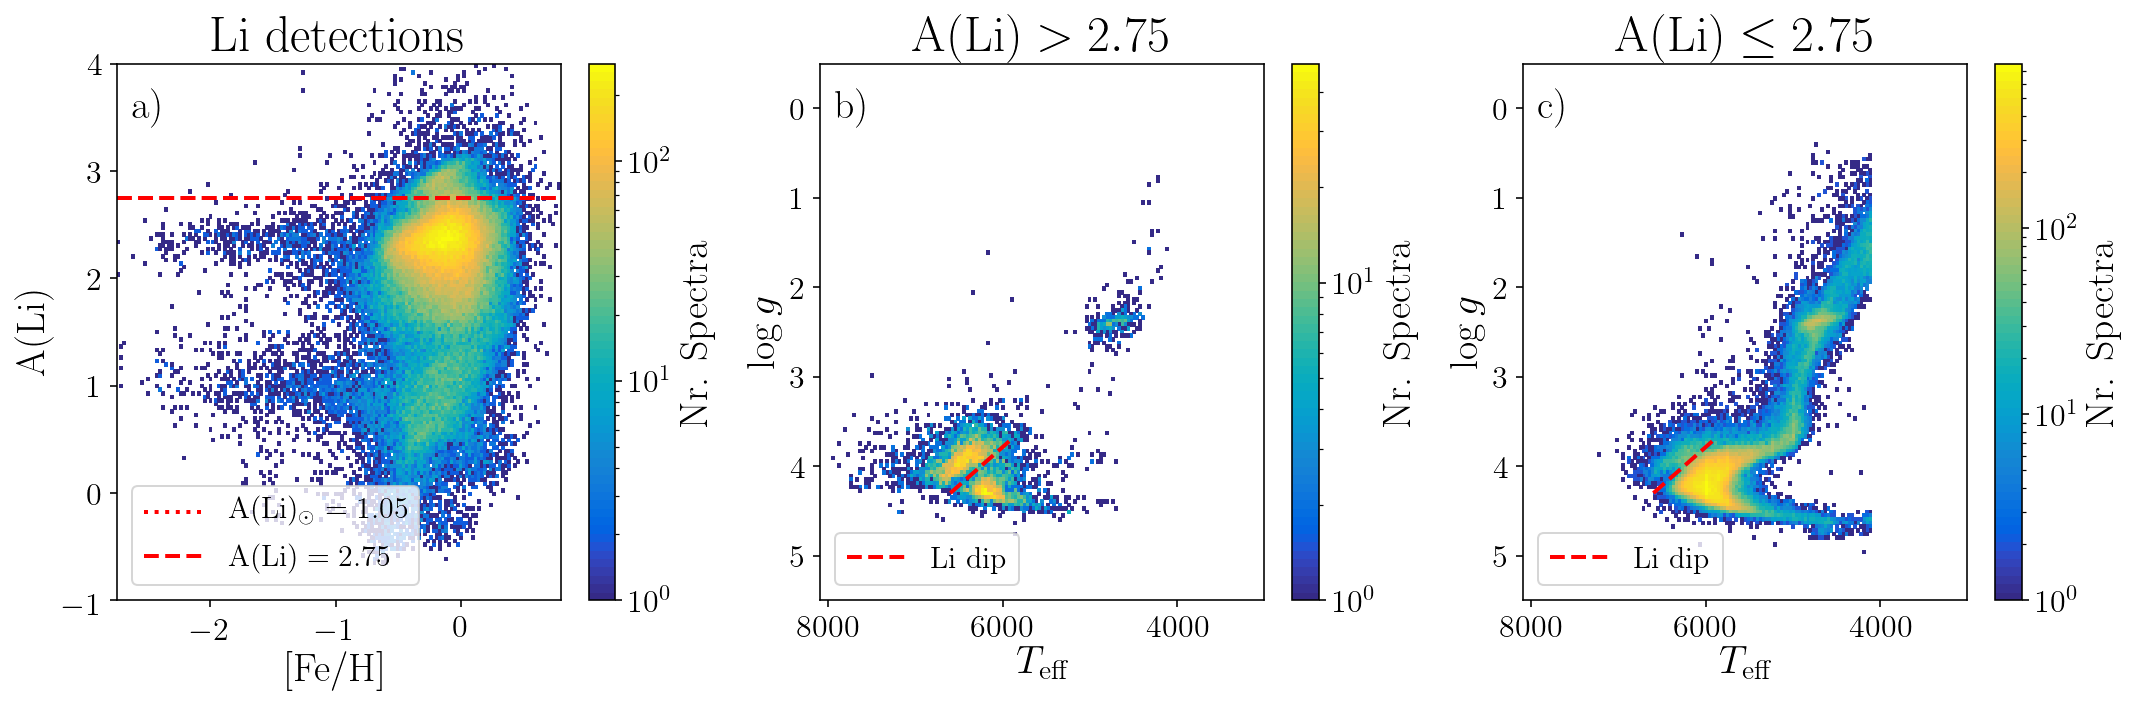

In [37]:
def plot_li_coverage(lim1 = 2.6, flag_li=0):

    f, gs = plt.subplots(1,3,figsize=(15,5))

    teff_bins = (3000,8100)
    logg_bins = (-0.5,5.5)

    hist_kwargs_mean_value = dict(
        reduce_fn='mean',
        bins = (np.linspace(teff_bins[0],teff_bins[1],100),np.linspace(logg_bins[0],logg_bins[1],100)),
        vmin=0,vmax=3,
        cmap = parula,
        cmin = 1,
        rasterized = True,
        zorder=2
    )

    use = (dr3['flag_sp'] == 0) & (dr3['flag_Li_fe'] <= flag_li)
    print(len(dr3['Li_fe'][use]))
    
    ax=gs[0]

    props = dict(facecolor='w', edgecolor='None', alpha=0.85)   

    p,x,y,s = ax.hist2d(
        dr3['fe_h'][use],
        dr3['Li_fe'][use]+dr3['fe_h'][use]+1.05,
        bins = (np.linspace(-2.75,0.8,150),np.linspace(-1,4,150)),
        cmap = parula,
        cmin = 1,
        norm=LogNorm(),
        rasterized = True,
    )    
    c = plt.colorbar(s, ax=ax)
    c.set_label(r'Nr. Spectra')
    ax.set_xlabel(r'[Fe/H]')
    ax.set_ylabel(r'A(Li)')
    ax.set_title(r'Li detections',fontsize=25)
    ax.text(0.035,0.9,'a)',fontsize=20, transform=ax.transAxes,bbox=props)
    ax.axhline(lim1,c='r',lw=2,ls='dotted',label=r'$\mathrm{A(Li)_\odot}=1.05$')
    ax.axhline(lim1,c='r',lw=2,ls='dashed',label=r'$\mathrm{A(Li)}='+str(lim1)+'$')
    ax.legend(loc='lower left',fontsize=15)
    
    limits = dict()
    limits[0] = (dr3['flag_sp'] == 0) & (dr3['flag_Li_fe'] <= flag_li) & (dr3['Li_fe'] + dr3['fe_h'] + 1.05 > lim1)
    limits[1] = (dr3['flag_sp'] == 0) & (dr3['flag_Li_fe'] <= flag_li) & (dr3['Li_fe'] + dr3['fe_h'] + 1.05 <= lim1)

    for ax_id in range(2):

        ax = gs[ax_id+1]

        p,x,y,s = ax.hist2d(
            dr3['teff'][limits[ax_id]],
            dr3['logg'][limits[ax_id]],
            bins = (np.linspace(teff_bins[0],teff_bins[1],150),np.linspace(logg_bins[0],logg_bins[1],150)),
            cmap = parula,
            cmin = 1,
            norm=LogNorm(),
            rasterized = True,
        )

        if ax_id==0:
            ax.set_title(r'$\mathrm{A(Li)} > '+str(lim1)+'$',fontsize=25)
            ax.text(0.035,0.9,'b)',fontsize=20, transform=ax.transAxes,bbox=props)
        if ax_id==1:
            ax.set_title(r'$\mathrm{A(Li)} \leq '+str(lim1)+'$',fontsize=25)
            ax.text(0.035,0.9,'c)',fontsize=20, transform=ax.transAxes,bbox=props)

        ax.set_xlim(teff_bins[1],teff_bins[0])
        ax.set_xlabel(r'$T_\text{eff}$')
        ax.set_ylim(logg_bins[1],logg_bins[0])
        ax.set_ylabel(r'$\log g$')
        c = plt.colorbar(s, ax=ax)
        c.set_label(r'Nr. Spectra')
        
        ax.plot([6600,5900],[4.3,3.7],c='r',ls='dashed',lw=2,label='Li dip')
        
        ax.legend(loc='lower left',fontsize=15)
        
    plt.tight_layout()
    plt.savefig('../../dr3_release_paper/figures/DR3_Li_overview.png',dpi=200,bbox_inches='tight')

plot_li_coverage(lim1 = 2.75)

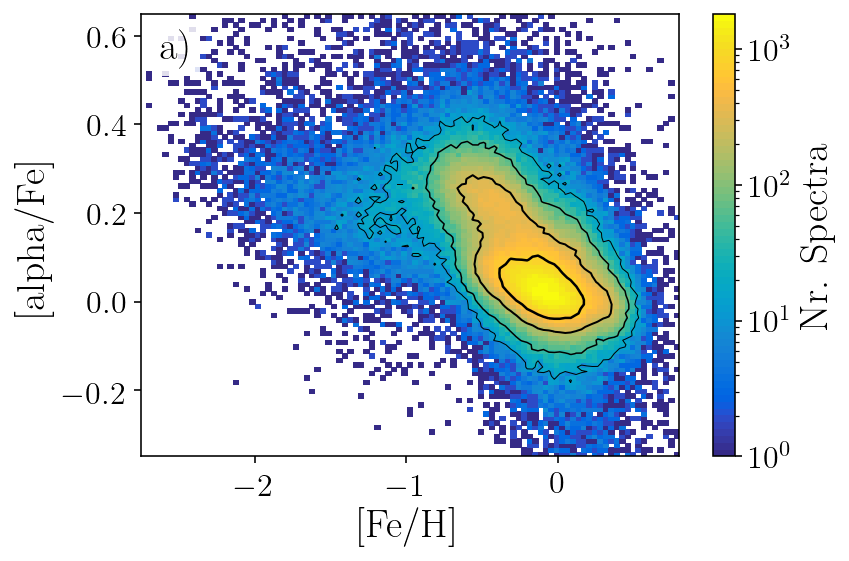

In [38]:
def plot_element_coverage(element='Li',ylim=(-1,4), flag_x_fe=0, letter='a'):

    use = (dr3['flag_sp'] == 0) & (dr3['flag_'+element+'_fe'] <= flag_x_fe)
    
    f, ax = plt.subplots(1,1)

    props = dict(facecolor='w', edgecolor='None', alpha=0.85)   

    p,x,y,s = ax.hist2d(
        dr3['fe_h'][use],
        dr3[element+'_fe'][use],
        bins = (np.linspace(-2.75,0.8,100),np.linspace(ylim[0],ylim[1],100)),
        cmap = parula,
        cmin = 1,
        norm=LogNorm(),
        rasterized = True,
    )
    ax.contour(x[:-1],y[:-1],p.T,origin='lower',levels=[15,50,250,750],colors=['k','k','k','k'],linewidths=[0.5,0.75,1.0,1.25])
    c = plt.colorbar(s, ax=ax)
    c.set_label(r'Nr. Spectra')
    ax.set_xlabel(r'[Fe/H]')
    ax.set_ylabel(r'['+element+'/Fe]')
    ax.text(0.035,0.9,letter+')',fontsize=20, transform=ax.transAxes,bbox=props)
    #ax.legend(loc='lower left',fontsize=15)
    

    plt.tight_layout()

plot_element_coverage(element='alpha',ylim=(-0.35,0.65), flag_x_fe=0, letter='a')
    
    
# # LITHIUM
# plot_element_coverage(element='Li',ylim=(-1,4), flag_x_fe=0, letter='a')

# # ALPHA-PROCESS
# # plot_element_coverage(element='C',ylim=(-1,2), flag_x_fe=0)
# # plot_element_coverage(element='O',ylim=(-1,2), flag_x_fe=0)
# plot_element_coverage(element='Mg',ylim=(-1,1.5), flag_x_fe=0, letter='c')
# # plot_element_coverage(element='Si',ylim=(-1,2), flag_x_fe=0)
# # plot_element_coverage(element='Ca',ylim=(-1,2), flag_x_fe=0)
# # plot_element_coverage(element='Ti',ylim=(-1,2), flag_x_fe=0)
# # plot_element_coverage(element='K',ylim=(-1,2), flag_x_fe=0)
# # plot_element_coverage(element='Sc',ylim=(-1,2), flag_x_fe=0)

# # Light Odd-Z
# plot_element_coverage(element='Na',ylim=(-1,1.5), flag_x_fe=0, letter='b')
# # plot_element_coverage(element='Al',ylim=(-1,2), flag_x_fe=0)

# # Iron-peak
# # plot_element_coverage(element='V',ylim=(-1,2), flag_x_fe=0)
# # plot_element_coverage(element='Cr',ylim=(-1,2), flag_x_fe=0)
# plot_element_coverage(element='Mn',ylim=(-1,1.5), flag_x_fe=0, letter='d')
# # plot_element_coverage(element='Co',ylim=(-1,2), flag_x_fe=0)
# # plot_element_coverage(element='Ni',ylim=(-1,2), flag_x_fe=0, letter='e')
# plot_element_coverage(element='Cu',ylim=(-1,1.5), flag_x_fe=0, letter='e')
# # plot_element_coverage(element='Zn',ylim=(-1,2), flag_x_fe=0)

# # plot_element_coverage(element='Rb',ylim=(-1,2), flag_x_fe=0)
# # plot_element_coverage(element='Sr',ylim=(-1,2), flag_x_fe=0)
# # plot_element_coverage(element='Y',ylim=(-1,2), flag_x_fe=0, letter='g')
# # plot_element_coverage(element='Zr',ylim=(-1,2), flag_x_fe=0)
# # plot_element_coverage(element='Mo',ylim=(-1,2), flag_x_fe=0)
# # plot_element_coverage(element='Ru',ylim=(-1,2), flag_x_fe=0)
# plot_element_coverage(element='Ba',ylim=(-1,1.5), flag_x_fe=0, letter='f')
# # plot_element_coverage(element='La',ylim=(-1,2), flag_x_fe=0)
# # plot_element_coverage(element='Ce',ylim=(-1,2), flag_x_fe=0)
# # plot_element_coverage(element='Nd',ylim=(-1,2), flag_x_fe=0)
# # plot_element_coverage(element='Sm',ylim=(-1,2), flag_x_fe=0)
# plot_element_coverage(element='Eu',ylim=(-1,1.5), flag_x_fe=0, letter='g')

